# Zillow Zestimate 
### Author: Ruchita Nagare

In [229]:
import pandas as pd
import numpy as np
import seaborn as sns
import datetime
import matplotlib.pyplot as plt
import matplotlib.dates as dates
%matplotlib inline
pd.set_option('display.max_columns', None)

# Importing the dataset

In [469]:
properties_2016 = pd.read_csv('Dataset/properties_2016.csv', low_memory=False)
train_2016 = pd.read_csv('Dataset/train_2016.csv')

In [470]:
# Shape of the datasets
print('Shape of properties_2016: ', properties_2016.shape)
print('Shape of train_2016: ', train_2016.shape)

Shape of properties_2016:  (2985217, 58)
Shape of train_2016:  (90275, 3)


In [471]:
properties_2016.head()

,parcelid,airconditioningtypeid,architecturalstyletypeid,basementsqft,bathroomcnt,bedroomcnt,buildingclasstypeid,buildingqualitytypeid,calculatedbathnbr,decktypeid,finishedfloor1squarefeet,calculatedfinishedsquarefeet,finishedsquarefeet12,finishedsquarefeet13,finishedsquarefeet15,finishedsquarefeet50,finishedsquarefeet6,fips,fireplacecnt,fullbathcnt,garagecarcnt,garagetotalsqft,hashottuborspa,heatingorsystemtypeid,latitude,longitude,lotsizesquarefeet,poolcnt,poolsizesum,pooltypeid10,pooltypeid2,pooltypeid7,propertycountylandusecode,propertylandusetypeid,propertyzoningdesc,rawcensustractandblock,regionidcity,regionidcounty,regionidneighborhood,regionidzip,roomcnt,storytypeid,threequarterbathnbr,typeconstructiontypeid,unitcnt,yardbuildingsqft17,yardbuildingsqft26,yearbuilt,numberofstories,fireplaceflag,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,taxdelinquencyflag,taxdelinquencyyear,censustractandblock
0,10754147,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6037.0,NaN,NaN,NaN,NaN,NaN,NaN,34144442.0,-118654084.0,85768.0,NaN,NaN,NaN,NaN,NaN,010D,269.0,NaN,6.037800e+07,37688.0,3101.0,NaN,96337.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.0,2015.0,9.0,NaN,NaN,NaN,NaN
1,10759547,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6037.0,NaN,NaN,NaN,NaN,NaN,NaN,34140430.0,-118625364.0,4083.0,NaN,NaN,NaN,NaN,NaN,0109,261.0,LCA11*,6.037800e+07,37688.0,3101.0,NaN,96337.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,27516.0,2015.0,27516.0,NaN,NaN,NaN,NaN
2,10843547,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,73026.0,NaN,NaN,73026.0,NaN,NaN,6037.0,NaN,NaN,NaN,NaN,NaN,NaN,33989359.0,-118394633.0,63085.0,NaN,NaN,NaN,NaN,NaN,1200,47.0,LAC2,6.037703e+07,51617.0,3101.0,NaN,96095.0,0.0,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,650756.0,1413387.0,2015.0,762631.0,20800.37,NaN,NaN,NaN
3,10859147,NaN,NaN,NaN,0.0,0.0,3.0,7.0,NaN,NaN,NaN,5068.0,NaN,NaN,5068.0,NaN,NaN,6037.0,NaN,NaN,NaN,NaN,NaN,NaN,34148863.0,-118437206.0,7521.0,NaN,NaN,NaN,NaN,NaN,1200,47.0,LAC2,6.037141e+07,12447.0,3101.0,27080.0,96424.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,1948.0,1.0,NaN,571346.0,1156834.0,2015.0,585488.0,14557.57,NaN,NaN,NaN
4,10879947,NaN,NaN,NaN,0.0,0.0,4.0,NaN,NaN,NaN,NaN,1776.0,NaN,NaN,1776.0,NaN,NaN,6037.0,NaN,NaN,NaN,NaN,NaN,NaN,34194168.0,-118385816.0,8512.0,NaN,NaN,NaN,NaN,NaN,1210,31.0,LAM1,6.037123e+07,12447.0,3101.0,46795.0,96450.0,0.0,NaN,NaN,NaN,1.0,NaN,NaN,1947.0,NaN,NaN,193796.0,433491.0,2015.0,239695.0,5725.17,NaN,NaN,NaN


In [472]:
train_2016.head()

,parcelid,logerror,transactiondate
0,11016594,0.0276,2016-01-01
1,14366692,-0.1684,2016-01-01
2,12098116,-0.0040,2016-01-01
3,12643413,0.0218,2016-01-02
4,14432541,-0.0050,2016-01-02


In [473]:
# Reforming Dataset by merging

df1 = properties_2016.copy()
df1 = df1.merge(train_2016,on = 'parcelid',how = 'inner')
df1.head()

,parcelid,airconditioningtypeid,architecturalstyletypeid,basementsqft,bathroomcnt,bedroomcnt,buildingclasstypeid,buildingqualitytypeid,calculatedbathnbr,decktypeid,finishedfloor1squarefeet,calculatedfinishedsquarefeet,finishedsquarefeet12,finishedsquarefeet13,finishedsquarefeet15,finishedsquarefeet50,finishedsquarefeet6,fips,fireplacecnt,fullbathcnt,garagecarcnt,garagetotalsqft,hashottuborspa,heatingorsystemtypeid,latitude,longitude,lotsizesquarefeet,poolcnt,poolsizesum,pooltypeid10,pooltypeid2,pooltypeid7,propertycountylandusecode,propertylandusetypeid,propertyzoningdesc,rawcensustractandblock,regionidcity,regionidcounty,regionidneighborhood,regionidzip,roomcnt,storytypeid,threequarterbathnbr,typeconstructiontypeid,unitcnt,yardbuildingsqft17,yardbuildingsqft26,yearbuilt,numberofstories,fireplaceflag,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,taxdelinquencyflag,taxdelinquencyyear,censustractandblock,logerror,transactiondate
0,17073783,NaN,NaN,NaN,2.5,3.0,NaN,NaN,2.5,NaN,548.0,1264.0,1264.0,NaN,NaN,548.0,NaN,6111.0,NaN,2.0,2.0,0.0,NaN,NaN,34303597.0,-119287236.0,1735.0,NaN,NaN,NaN,NaN,NaN,1128,265.0,NaN,6.111002e+07,34543.0,2061.0,NaN,97081.0,5.0,NaN,1.0,NaN,NaN,128.0,NaN,1986.0,2.0,NaN,115087.0,191811.0,2015.0,76724.0,2015.06,NaN,NaN,6.111002e+13,0.0953,2016-01-27
1,17088994,NaN,NaN,NaN,1.0,2.0,NaN,NaN,1.0,NaN,777.0,777.0,777.0,NaN,NaN,777.0,NaN,6111.0,NaN,1.0,1.0,0.0,NaN,NaN,34272866.0,-119198911.0,NaN,NaN,NaN,NaN,NaN,NaN,1129,266.0,NaN,6.111002e+07,34543.0,2061.0,NaN,97083.0,4.0,NaN,NaN,NaN,NaN,198.0,NaN,1990.0,1.0,NaN,143809.0,239679.0,2015.0,95870.0,2581.30,NaN,NaN,6.111002e+13,0.0198,2016-03-30
2,17100444,NaN,NaN,NaN,2.0,3.0,NaN,NaN,2.0,NaN,1101.0,1101.0,1101.0,NaN,NaN,1101.0,NaN,6111.0,NaN,2.0,2.0,441.0,NaN,NaN,34340801.0,-119079610.0,6569.0,NaN,NaN,NaN,NaN,NaN,1111,261.0,NaN,6.111001e+07,26965.0,2061.0,NaN,97113.0,5.0,NaN,NaN,NaN,NaN,NaN,NaN,1956.0,1.0,NaN,33619.0,47853.0,2015.0,14234.0,591.64,NaN,NaN,6.111001e+13,0.0060,2016-05-27
3,17102429,NaN,NaN,NaN,1.5,2.0,NaN,NaN,1.5,NaN,1554.0,1554.0,1554.0,NaN,NaN,1554.0,NaN,6111.0,1.0,1.0,2.0,460.0,NaN,NaN,34354313.0,-119076405.0,7400.0,NaN,NaN,NaN,NaN,NaN,1110,261.0,NaN,6.111001e+07,26965.0,2061.0,NaN,97113.0,5.0,NaN,1.0,NaN,NaN,NaN,NaN,1965.0,1.0,NaN,45609.0,62914.0,2015.0,17305.0,682.78,NaN,NaN,6.111001e+13,-0.0566,2016-06-07
4,17109604,NaN,NaN,NaN,2.5,4.0,NaN,NaN,2.5,NaN,1305.0,2415.0,2415.0,NaN,NaN,1305.0,NaN,6111.0,1.0,2.0,2.0,665.0,NaN,NaN,34266578.0,-119165392.0,6326.0,NaN,NaN,NaN,NaN,NaN,1111,261.0,NaN,6.111001e+07,34543.0,2061.0,NaN,97084.0,8.0,NaN,1.0,NaN,NaN,NaN,NaN,1984.0,2.0,NaN,277000.0,554000.0,2015.0,277000.0,5886.92,NaN,NaN,6.111001e+13,0.0573,2016-08-08


In [474]:
df1.shape

(90275, 60)

In [475]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 90275 entries, 0 to 90274
Data columns (total 60 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   parcelid                      90275 non-null  int64  
 1   airconditioningtypeid         28781 non-null  float64
 2   architecturalstyletypeid      261 non-null    float64
 3   basementsqft                  43 non-null     float64
 4   bathroomcnt                   90275 non-null  float64
 5   bedroomcnt                    90275 non-null  float64
 6   buildingclasstypeid           16 non-null     float64
 7   buildingqualitytypeid         57364 non-null  float64
 8   calculatedbathnbr             89093 non-null  float64
 9   decktypeid                    658 non-null    float64
 10  finishedfloor1squarefeet      6856 non-null   float64
 11  calculatedfinishedsquarefeet  89614 non-null  float64
 12  finishedsquarefeet12          85596 non-null  float64
 13  f

array([[<AxesSubplot:title={'center':'parcelid'}>,
        <AxesSubplot:title={'center':'airconditioningtypeid'}>,
        <AxesSubplot:title={'center':'architecturalstyletypeid'}>,
        <AxesSubplot:title={'center':'basementsqft'}>,
        <AxesSubplot:title={'center':'bathroomcnt'}>],
       [<AxesSubplot:title={'center':'bedroomcnt'}>,
        <AxesSubplot:title={'center':'buildingclasstypeid'}>,
        <AxesSubplot:title={'center':'buildingqualitytypeid'}>,
        <AxesSubplot:title={'center':'calculatedbathnbr'}>,
        <AxesSubplot:title={'center':'decktypeid'}>],
       [<AxesSubplot:title={'center':'finishedfloor1squarefeet'}>,
        <AxesSubplot:title={'center':'calculatedfinishedsquarefeet'}>,
        <AxesSubplot:title={'center':'finishedsquarefeet12'}>,
        <AxesSubplot:title={'center':'finishedsquarefeet13'}>,
        <AxesSubplot:title={'center':'finishedsquarefeet15'}>],
       [<AxesSubplot:title={'center':'finishedsquarefeet50'}>,
        <AxesSubplot:tit

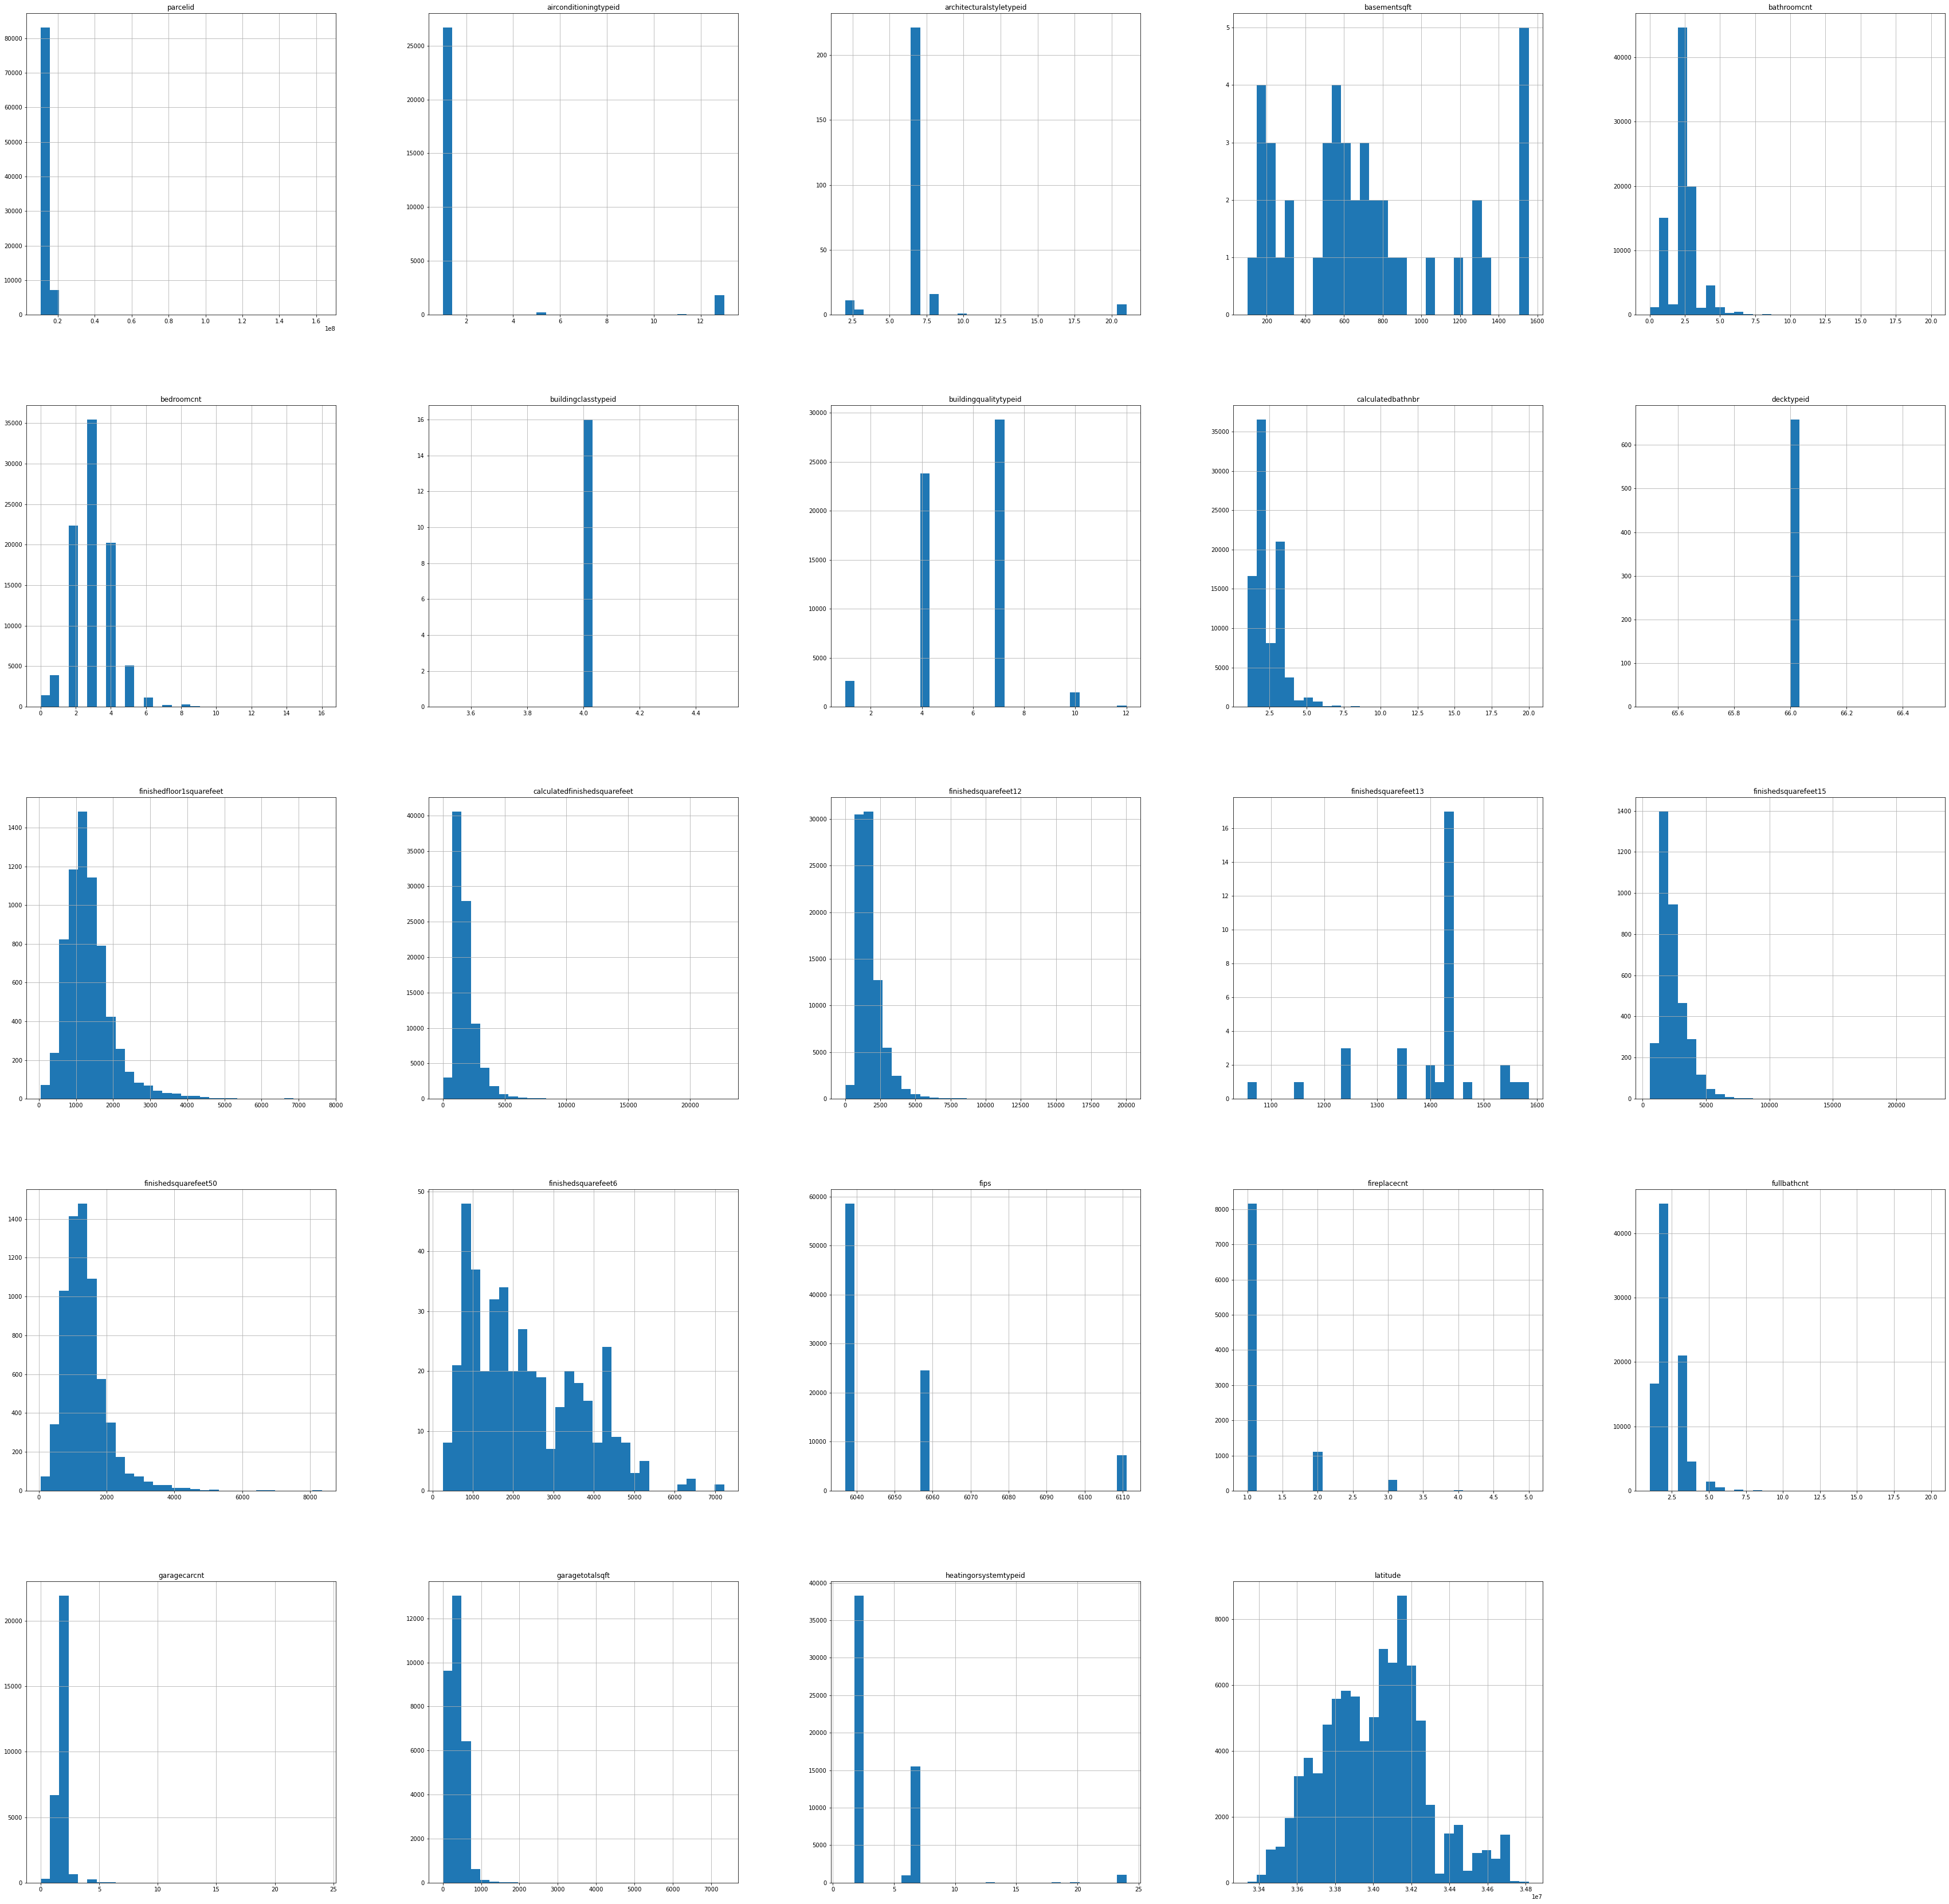

In [476]:
df1.hist(column = df1.columns.to_list()[:25], bins = 30,figsize=(60,60))

array([[<AxesSubplot:title={'center':'longitude'}>,
        <AxesSubplot:title={'center':'lotsizesquarefeet'}>,
        <AxesSubplot:title={'center':'poolcnt'}>,
        <AxesSubplot:title={'center':'poolsizesum'}>,
        <AxesSubplot:title={'center':'pooltypeid10'}>],
       [<AxesSubplot:title={'center':'pooltypeid2'}>,
        <AxesSubplot:title={'center':'pooltypeid7'}>,
        <AxesSubplot:title={'center':'propertylandusetypeid'}>,
        <AxesSubplot:title={'center':'rawcensustractandblock'}>,
        <AxesSubplot:title={'center':'regionidcity'}>],
       [<AxesSubplot:title={'center':'regionidcounty'}>,
        <AxesSubplot:title={'center':'regionidneighborhood'}>,
        <AxesSubplot:title={'center':'regionidzip'}>,
        <AxesSubplot:title={'center':'roomcnt'}>,
        <AxesSubplot:title={'center':'storytypeid'}>],
       [<AxesSubplot:title={'center':'threequarterbathnbr'}>,
        <AxesSubplot:title={'center':'typeconstructiontypeid'}>,
        <AxesSubplot:title={'

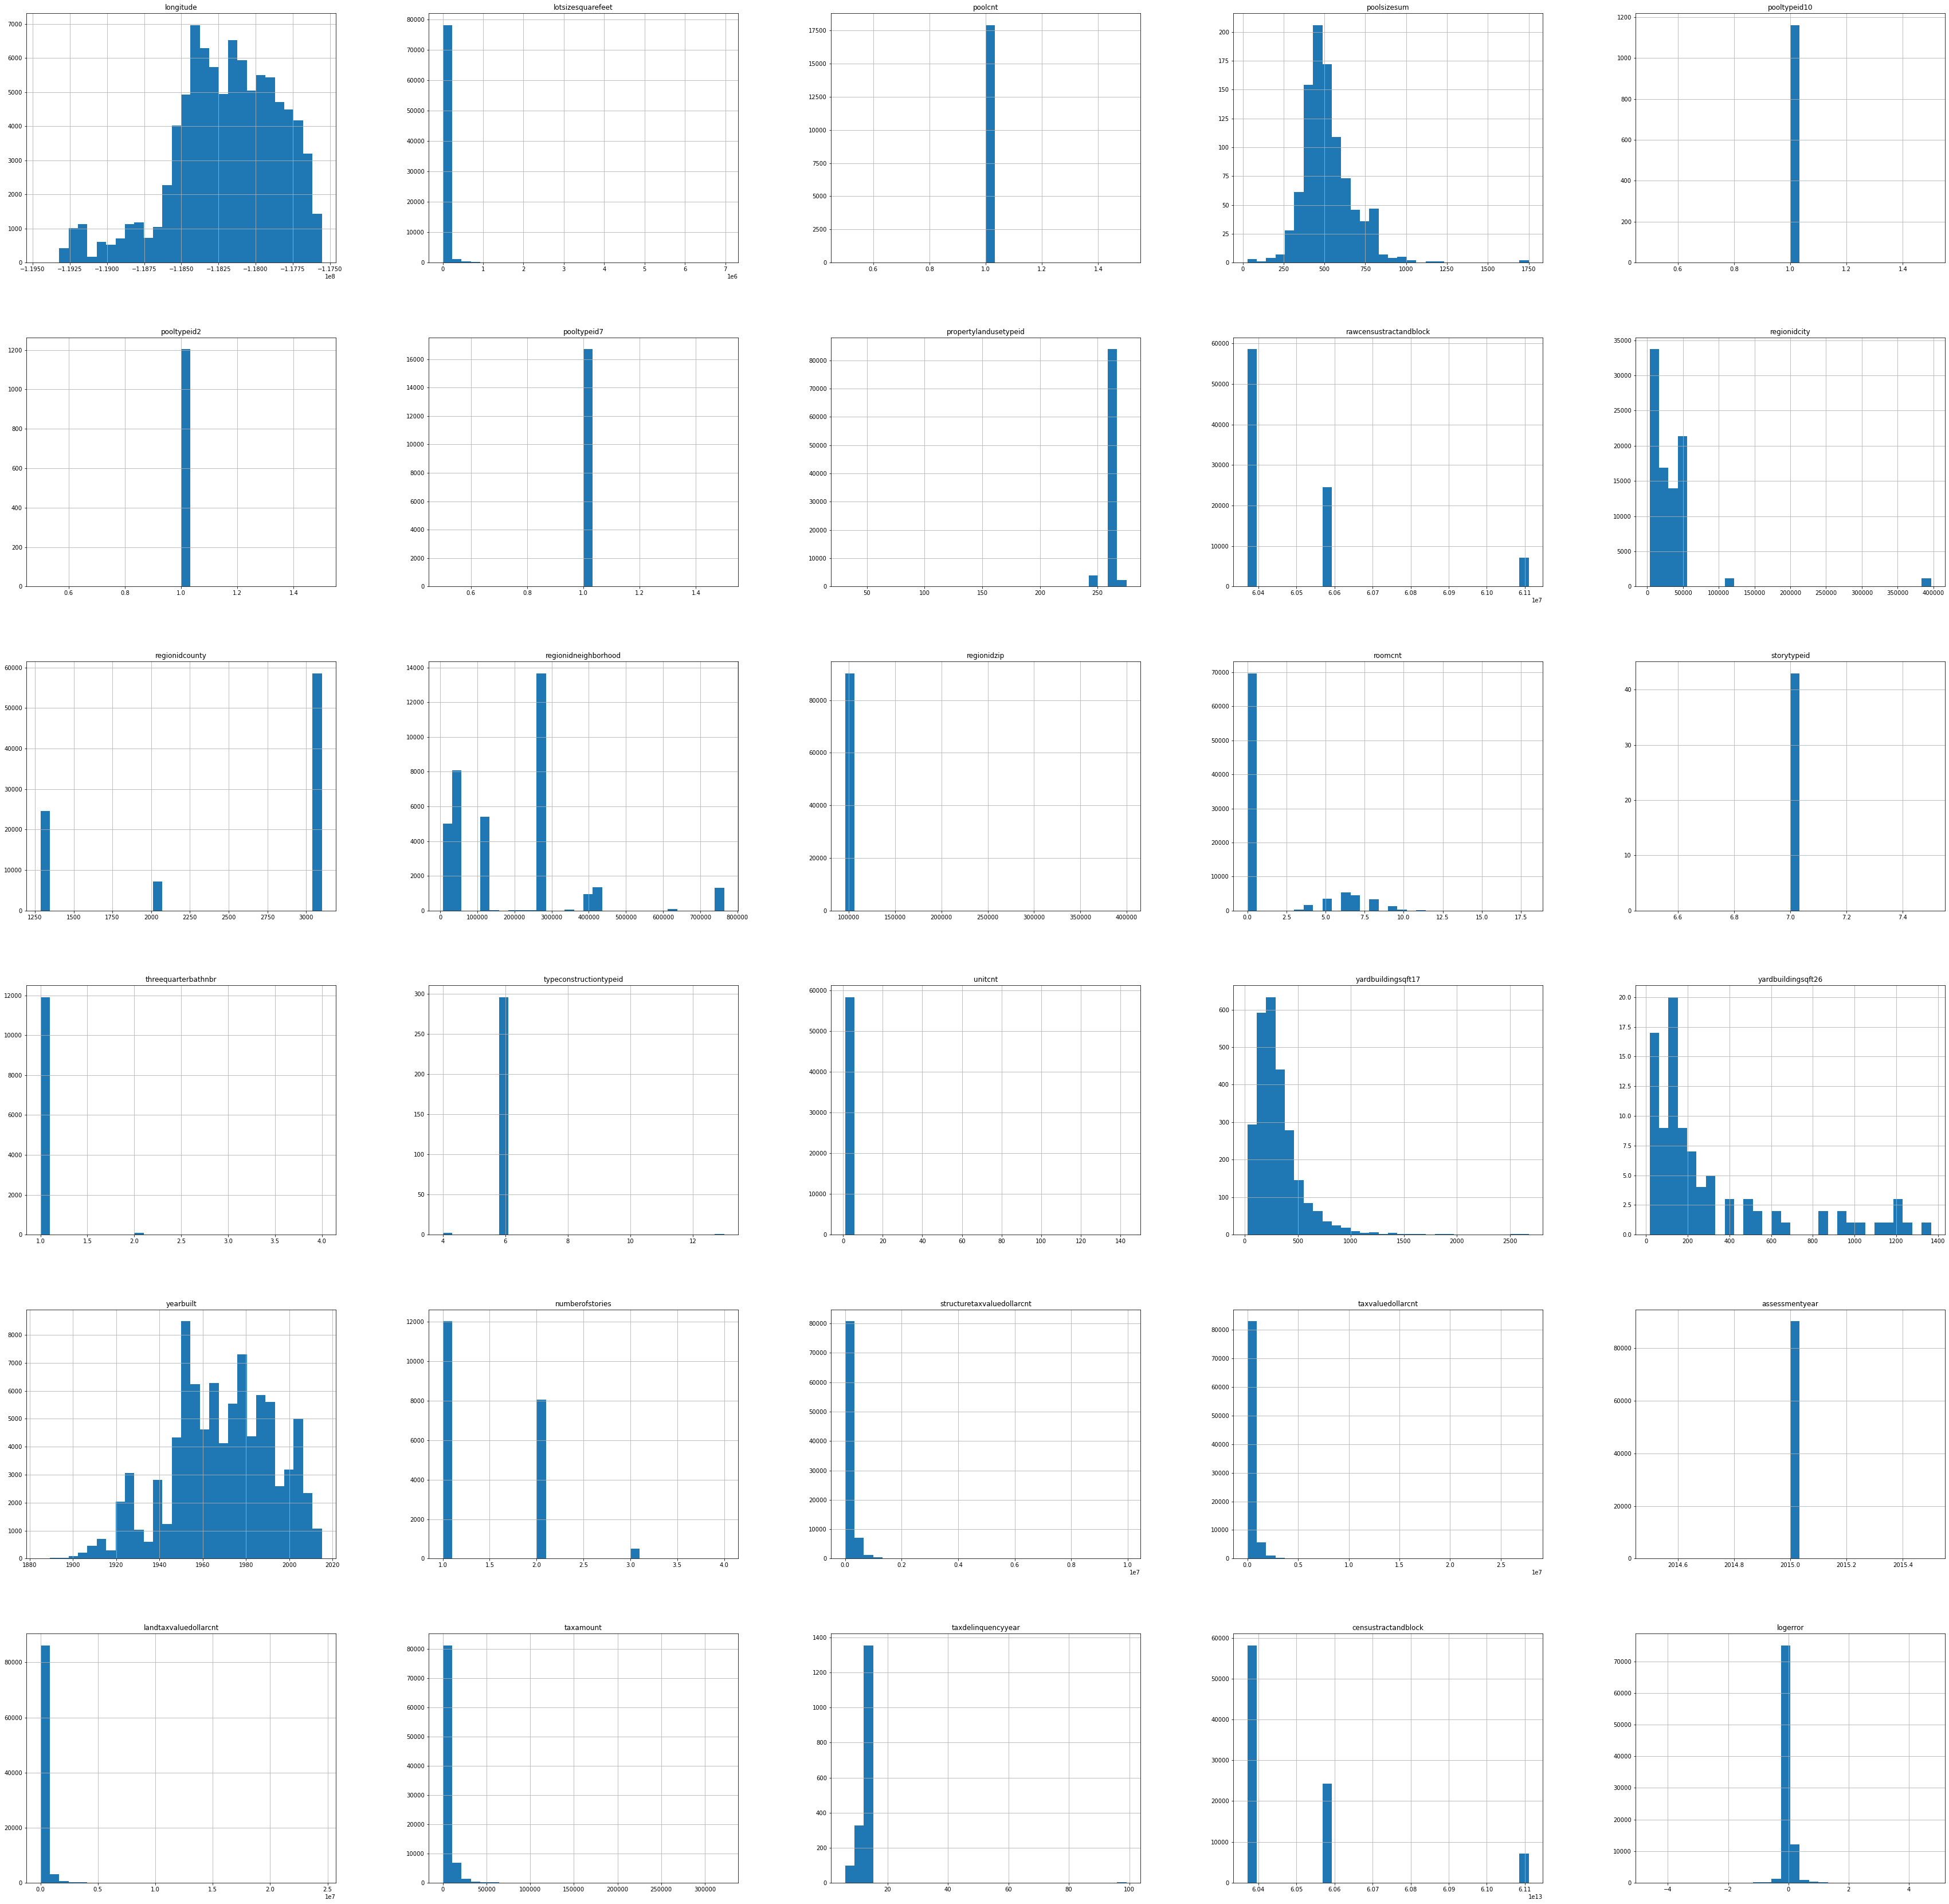

In [477]:
df1.hist(column = df1.columns.to_list()[25:], bins = 30,figsize=(60,60))

### For the purpose of this assignment lets consider the following numeric columns

In [496]:
col = ['yardbuildingsqft26','bedroomcnt', 'calculatedfinishedsquarefeet', 'finishedsquarefeet15', 'basementsqft']

array([[<AxesSubplot:title={'center':'yardbuildingsqft26'}>,
        <AxesSubplot:title={'center':'bedroomcnt'}>],
       [<AxesSubplot:title={'center':'calculatedfinishedsquarefeet'}>,
        <AxesSubplot:title={'center':'finishedsquarefeet15'}>],
       [<AxesSubplot:title={'center':'basementsqft'}>, <AxesSubplot:>]],
      dtype=object)

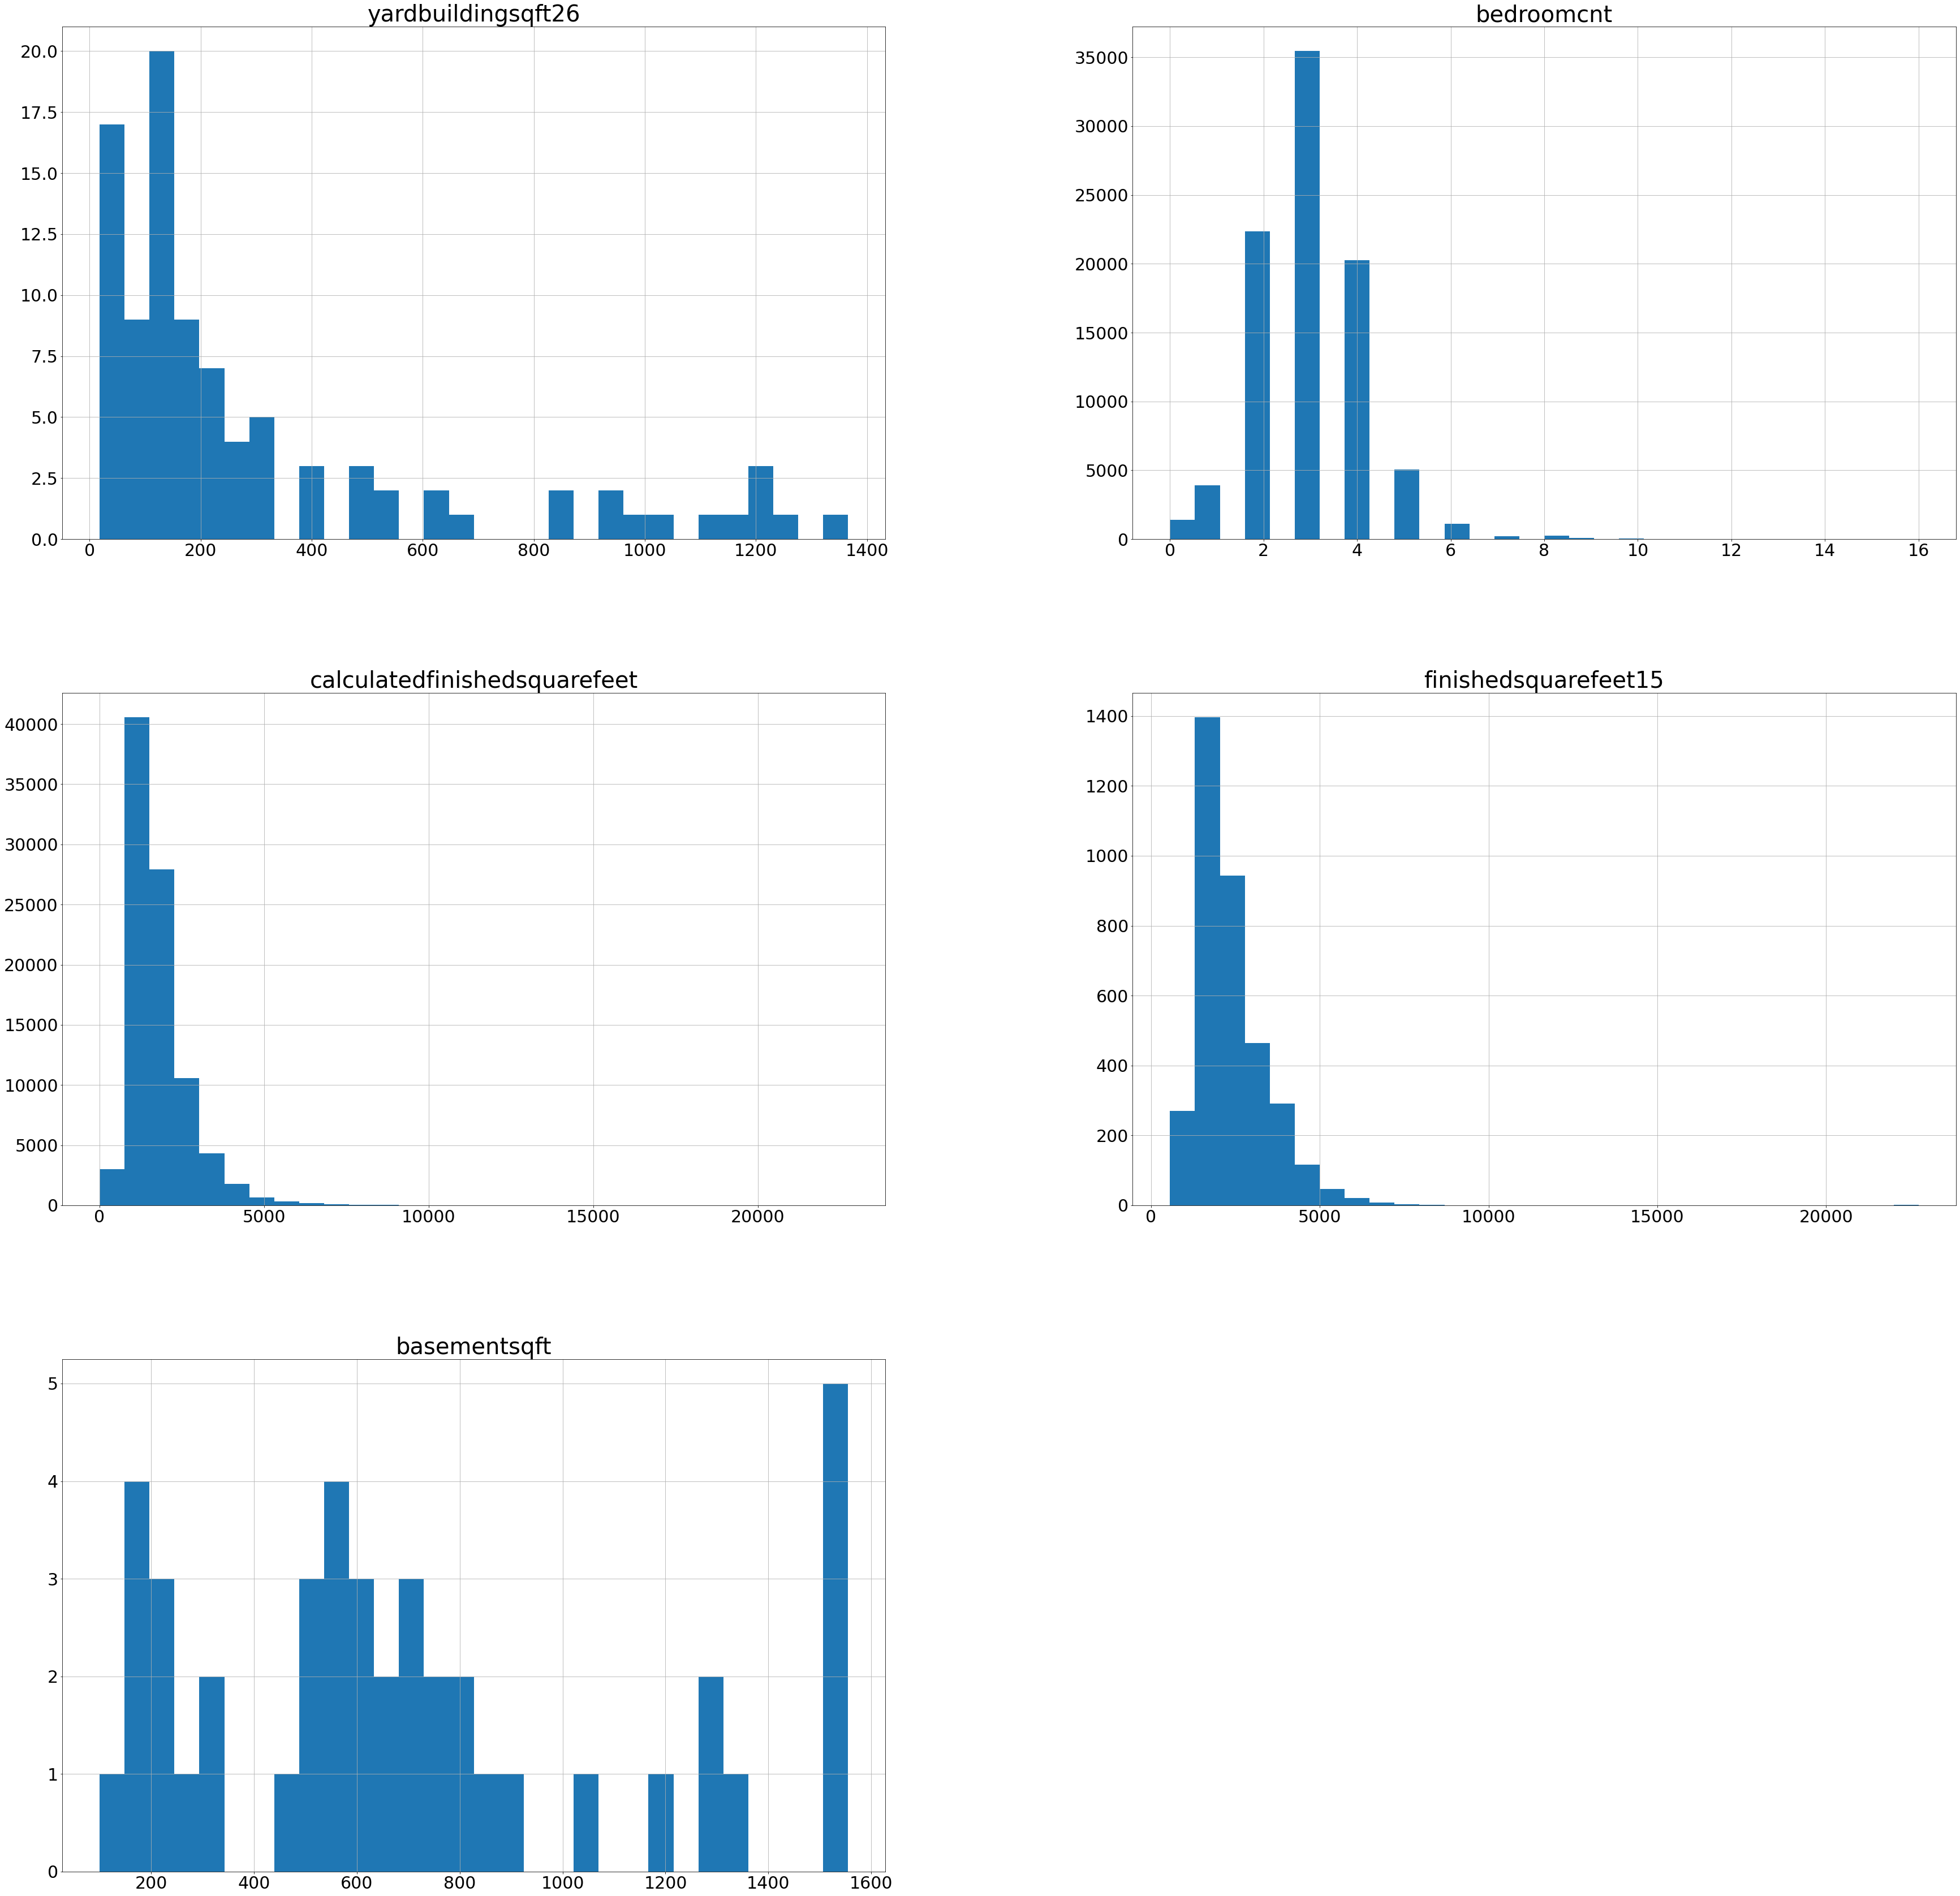

In [497]:
params = {'axes.titlesize':'40',
          'xtick.labelsize':'30',
          'ytick.labelsize':'30'}
plt.rcParams.update(params)
df1.hist(column = col, bins = 30,figsize=(60,60),xlabelsize=30,ylabelsize=30)

### Checking missing values

In [238]:
mis_val = [var for var in df1.columns if df1[var].isnull().sum()>0]

df1[mis_val].isnull().sum()

airconditioningtypeid           61494
architecturalstyletypeid        90014
basementsqft                    90232
buildingclasstypeid             90259
buildingqualitytypeid           32911
calculatedbathnbr                1182
decktypeid                      89617
finishedfloor1squarefeet        83419
calculatedfinishedsquarefeet      661
finishedsquarefeet12             4679
finishedsquarefeet13            90242
finishedsquarefeet15            86711
finishedsquarefeet50            83419
finishedsquarefeet6             89854
fireplacecnt                    80668
fullbathcnt                      1182
garagecarcnt                    60338
garagetotalsqft                 60338
hashottuborspa                  87910
heatingorsystemtypeid           34195
lotsizesquarefeet               10150
poolcnt                         72374
poolsizesum                     89306
pooltypeid10                    89114
pooltypeid2                     89071
pooltypeid7                     73578
propertycoun

In [239]:
df1.isnull().mean()*100

parcelid                         0.000000
airconditioningtypeid           68.118527
architecturalstyletypeid        99.710883
basementsqft                    99.952368
bathroomcnt                      0.000000
bedroomcnt                       0.000000
buildingclasstypeid             99.982276
buildingqualitytypeid           36.456383
calculatedbathnbr                1.309333
decktypeid                      99.271116
finishedfloor1squarefeet        92.405428
calculatedfinishedsquarefeet     0.732207
finishedsquarefeet12             5.183052
finishedsquarefeet13            99.963445
finishedsquarefeet15            96.052063
finishedsquarefeet50            92.405428
finishedsquarefeet6             99.533647
fips                             0.000000
fireplacecnt                    89.358073
fullbathcnt                      1.309333
garagecarcnt                    66.837995
garagetotalsqft                 66.837995
hashottuborspa                  97.380227
heatingorsystemtypeid           37

In [240]:
# Columns that have more than 80% data missing
most_missing_data = df1.columns[df1.isnull().mean()*100 > 80]
most_missing_data

Index(['architecturalstyletypeid', 'basementsqft', 'buildingclasstypeid',
       'decktypeid', 'finishedfloor1squarefeet', 'finishedsquarefeet13',
       'finishedsquarefeet15', 'finishedsquarefeet50', 'finishedsquarefeet6',
       'fireplacecnt', 'hashottuborspa', 'poolcnt', 'poolsizesum',
       'pooltypeid10', 'pooltypeid2', 'pooltypeid7', 'storytypeid',
       'threequarterbathnbr', 'typeconstructiontypeid', 'yardbuildingsqft17',
       'yardbuildingsqft26', 'fireplaceflag', 'taxdelinquencyflag',
       'taxdelinquencyyear'],
      dtype='object')

In [241]:
most_missing_data.shape

(24,)

In [242]:
# Checking these features before deciding if they should be dropped

In [243]:
for x in most_missing_data:
    print(df1[x].value_counts())

7.0     221
8.0      16
2.0      11
21.0      8
3.0       4
10.0      1
Name: architecturalstyletypeid, dtype: int64
1528.0    3
700.0     2
1312.0    2
771.0     1
493.0     1
1048.0    1
540.0     1
100.0     1
515.0     1
510.0     1
198.0     1
616.0     1
585.0     1
162.0     1
608.0     1
312.0     1
913.0     1
1555.0    1
671.0     1
1210.0    1
564.0     1
579.0     1
1350.0    1
196.0     1
676.0     1
831.0     1
234.0     1
485.0     1
814.0     1
760.0     1
690.0     1
184.0     1
238.0     1
802.0     1
168.0     1
330.0     1
1551.0    1
260.0     1
557.0     1
Name: basementsqft, dtype: int64
4.0    16
Name: buildingclasstypeid, dtype: int64
66.0    658
Name: decktypeid, dtype: int64
1431.0    24
1260.0    24
1226.0    24
817.0     24
1104.0    21
          ..
2131.0     1
1011.0     1
4860.0     1
2776.0     1
1203.0     1
Name: finishedfloor1squarefeet, Length: 1886, dtype: int64
1440.0    17
1344.0     3
1248.0     3
1536.0     2
1392.0     2
1416.0     1
1584.0   

<font color = 'blue'> architecturalstyletypeid: does not contribute much information and has 99.71% data missing, thus can be dropped.
basementsqft: does not give much valueable information either. Basement sqft contributes to the total sqft of the house. Can be dropped.
buildingclasstypeid: Very few entries, cannot replace nulls with anything logical. Can be dropped
decktypeid: Can replace 66 with 1 and NaN with 0. But there are only 658 total entries for this feature. Thus I find it best to be dropped.
finishedsquarefeet13 and finishedsquarefeet6: Not significant. Contribute to total area of the house.
finishedsquarefeet15: Similar to calculatedfinishedsquarefeet. Thus, can be dropped.
hottuborspa: Can label True as 1 and False as 0. But only total of 2365 values are present. Cannot decide if it is hot tub or spa if 1. Thus, drop because difficult to decipher.
poolsizesum, pooltypeid10, pooltypeid2: According to me it is more logical to keep poolcnt and pooltypeid7 which offer more data. Thus, drop these.
storytypeid: Very few data. Thus drop.
typeconstructiontypeid: Very few data. Therefore, drop.
yardbuildingsqft17 and yardbuildingsqft26: No other data that suggests info for yard, but very few entries so maybe dropping is a good option.
fireplaceflag: very few data and fireplacecnt is rather a better feature to retain.
taxdelinquencyflag: Can convert data to 0 and 1. BUt very few data, therefore drop.
taxdelinquencyyear: Very few data. Drop.
finishedsquarefeet50 and finishedfloor1squarefeet both give information about the same thing (1st floor of the house).
For convenience I shall keep only calculatedfinishedsquarefeet feature which gives information about total sqft of the house.
Therefore drop the above two columns. </font>

In [246]:
# It seems like calculatedbathnbr should encompass the data of fullbathcnt and threequarterbathnbr 

bathrooms = df1[df1['fullbathcnt'].notnull() & df1['threequarterbathnbr'].notnull() & df1['calculatedbathnbr'].notnull()]
bathrooms[['fullbathcnt','threequarterbathnbr','calculatedbathnbr']]

,fullbathcnt,threequarterbathnbr,calculatedbathnbr
0,2.0,1.0,2.5
3,1.0,1.0,1.5
4,2.0,1.0,2.5
5,2.0,1.0,2.5
7,2.0,1.0,2.5
...,...,...,...
90249,3.0,1.0,3.5
90252,2.0,1.0,2.5
90267,2.0,1.0,2.5
90273,2.0,1.0,2.5


In [247]:
for x in most_missing_data:
    df1.drop(x, axis=1, inplace=True)

In [248]:
df1.drop('fullbathcnt', axis=1, inplace=True)

In [249]:
#Setting parcelid as the index
df1 = df1.set_index('parcelid')

In [250]:
df1.head()

,airconditioningtypeid,bathroomcnt,bedroomcnt,buildingqualitytypeid,calculatedbathnbr,calculatedfinishedsquarefeet,finishedsquarefeet12,fips,garagecarcnt,garagetotalsqft,heatingorsystemtypeid,latitude,longitude,lotsizesquarefeet,propertycountylandusecode,propertylandusetypeid,propertyzoningdesc,rawcensustractandblock,regionidcity,regionidcounty,regionidneighborhood,regionidzip,roomcnt,unitcnt,yearbuilt,numberofstories,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,censustractandblock,logerror,transactiondate
parcelid,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
17073783,NaN,2.5,3.0,NaN,2.5,1264.0,1264.0,6111.0,2.0,0.0,NaN,34303597.0,-119287236.0,1735.0,1128,265.0,NaN,6.111002e+07,34543.0,2061.0,NaN,97081.0,5.0,NaN,1986.0,2.0,115087.0,191811.0,2015.0,76724.0,2015.06,6.111002e+13,0.0953,2016-01-27
17088994,NaN,1.0,2.0,NaN,1.0,777.0,777.0,6111.0,1.0,0.0,NaN,34272866.0,-119198911.0,NaN,1129,266.0,NaN,6.111002e+07,34543.0,2061.0,NaN,97083.0,4.0,NaN,1990.0,1.0,143809.0,239679.0,2015.0,95870.0,2581.30,6.111002e+13,0.0198,2016-03-30
17100444,NaN,2.0,3.0,NaN,2.0,1101.0,1101.0,6111.0,2.0,441.0,NaN,34340801.0,-119079610.0,6569.0,1111,261.0,NaN,6.111001e+07,26965.0,2061.0,NaN,97113.0,5.0,NaN,1956.0,1.0,33619.0,47853.0,2015.0,14234.0,591.64,6.111001e+13,0.0060,2016-05-27
17102429,NaN,1.5,2.0,NaN,1.5,1554.0,1554.0,6111.0,2.0,460.0,NaN,34354313.0,-119076405.0,7400.0,1110,261.0,NaN,6.111001e+07,26965.0,2061.0,NaN,97113.0,5.0,NaN,1965.0,1.0,45609.0,62914.0,2015.0,17305.0,682.78,6.111001e+13,-0.0566,2016-06-07
17109604,NaN,2.5,4.0,NaN,2.5,2415.0,2415.0,6111.0,2.0,665.0,NaN,34266578.0,-119165392.0,6326.0,1111,261.0,NaN,6.111001e+07,34543.0,2061.0,NaN,97084.0,8.0,NaN,1984.0,2.0,277000.0,554000.0,2015.0,277000.0,5886.92,6.111001e+13,0.0573,2016-08-08


In [251]:
# for the purpose of this assignment I am also dropping transactiondate
df1.drop('transactiondate', axis=1, inplace=True)

In [252]:
df1.shape

(90275, 33)

In [253]:
df1.isnull().mean()*100

airconditioningtypeid           68.118527
bathroomcnt                      0.000000
bedroomcnt                       0.000000
buildingqualitytypeid           36.456383
calculatedbathnbr                1.309333
calculatedfinishedsquarefeet     0.732207
finishedsquarefeet12             5.183052
fips                             0.000000
garagecarcnt                    66.837995
garagetotalsqft                 66.837995
heatingorsystemtypeid           37.878704
latitude                         0.000000
longitude                        0.000000
lotsizesquarefeet               11.243423
propertycountylandusecode        0.001108
propertylandusetypeid            0.000000
propertyzoningdesc              35.405151
rawcensustractandblock           0.000000
regionidcity                     1.997231
regionidcounty                   0.000000
regionidneighborhood            60.108557
regionidzip                      0.038770
roomcnt                          0.000000
unitcnt                         35

In [255]:
for x in df1:
    print(df1[x].value_counts())

1.0     26668
13.0     1833
5.0       215
11.0       63
9.0         1
3.0         1
Name: airconditioningtypeid, dtype: int64
2.0     36534
3.0     19946
1.0     15035
2.5      8091
4.0      3743
1.5      1641
0.0      1165
5.0      1142
3.5      1091
4.5       795
6.0       448
5.5       253
7.0       155
8.0       114
6.5        54
9.0        36
10.0       14
7.5         9
12.0        3
11.0        3
8.5         1
20.0        1
15.0        1
Name: bathroomcnt, dtype: int64
3.0     35447
2.0     22357
4.0     20279
5.0      5077
1.0      3897
0.0      1421
6.0      1120
8.0       274
7.0       234
9.0        91
10.0       35
12.0       22
11.0       12
16.0        4
14.0        3
13.0        1
15.0        1
Name: bedroomcnt, dtype: int64
7.0     29310
4.0     23839
1.0      2627
10.0     1461
12.0      119
8.0         5
6.0         2
11.0        1
Name: buildingqualitytypeid, dtype: int64
2.0     36534
3.0     19946
1.0     15035
2.5      8084
4.0      3743
1.5      1636
5.0      1142

In [256]:
for col in ['heatingorsystemtypeid', 'propertylandusetypeid', 'airconditioningtypeid', 'propertycountylandusecode', 'propertyzoningdesc']:
    df1[col] = df1[col].astype('category')

In [257]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 90275 entries, 17073783 to 14636609
Data columns (total 33 columns):
 #   Column                        Non-Null Count  Dtype   
---  ------                        --------------  -----   
 0   airconditioningtypeid         28781 non-null  category
 1   bathroomcnt                   90275 non-null  float64 
 2   bedroomcnt                    90275 non-null  float64 
 3   buildingqualitytypeid         57364 non-null  float64 
 4   calculatedbathnbr             89093 non-null  float64 
 5   calculatedfinishedsquarefeet  89614 non-null  float64 
 6   finishedsquarefeet12          85596 non-null  float64 
 7   fips                          90275 non-null  float64 
 8   garagecarcnt                  29937 non-null  float64 
 9   garagetotalsqft               29937 non-null  float64 
 10  heatingorsystemtypeid         56080 non-null  category
 11  latitude                      90275 non-null  float64 
 12  longitude                     90275 

### Separating numeric and categorical data

In [258]:
zillow_num = df1.select_dtypes(include=[np.number])
zillow_cat = df1.select_dtypes(include=['category'])

In [259]:
zillow_num.shape

(90275, 28)

In [260]:
zillow_cat.shape

(90275, 5)

## Data Imputation

### Imputing numeric data with KNN Imputer

In [261]:
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=2)

X = imputer.fit_transform(zillow_num)

In [262]:
X

array([[ 2.50000000e+00,  3.00000000e+00,  4.00000000e+00, ...,
         2.01506000e+03,  6.11100220e+13,  9.53000000e-02],
       [ 1.00000000e+00,  2.00000000e+00,  4.00000000e+00, ...,
         2.58130000e+03,  6.11100150e+13,  1.98000000e-02],
       [ 2.00000000e+00,  3.00000000e+00,  4.00000000e+00, ...,
         5.91640000e+02,  6.11100070e+13,  6.00000000e-03],
       ...,
       [ 2.00000000e+00,  2.00000000e+00,  4.00000000e+00, ...,
         5.07041000e+03,  6.03719051e+13,  8.43000000e-02],
       [ 2.50000000e+00,  3.00000000e+00,  2.50000000e+00, ...,
         1.25083000e+04,  6.04826330e+13, -5.00000000e-03],
       [ 2.50000000e+00,  3.00000000e+00,  7.00000000e+00, ...,
         5.47012000e+03,  6.03711355e+13,  1.29000000e-02]])

In [263]:
zillow_num_tr = pd.DataFrame(X, columns=zillow_num.columns,index=df1.index)

In [264]:
zillow_num_tr

,bathroomcnt,bedroomcnt,buildingqualitytypeid,calculatedbathnbr,calculatedfinishedsquarefeet,finishedsquarefeet12,fips,garagecarcnt,garagetotalsqft,latitude,longitude,lotsizesquarefeet,rawcensustractandblock,regionidcity,regionidcounty,regionidneighborhood,regionidzip,roomcnt,unitcnt,yearbuilt,numberofstories,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,censustractandblock,logerror
parcelid,,,,,,,,,,,,,,,,,,,,,,,,,,,,
17073783,2.5,3.0,4.0,2.5,1264.0,1264.0,6111.0,2.0,0.0,34303597.0,-119287236.0,1735.0,6.111002e+07,34543.0,2061.0,404832.0,97081.0,5.0,2.0,1986.0,2.0,115087.0,191811.0,2015.0,76724.0,2015.06,6.111002e+13,0.0953
17088994,1.0,2.0,4.0,1.0,777.0,777.0,6111.0,1.0,0.0,34272866.0,-119198911.0,11078.5,6.111002e+07,34543.0,2061.0,438951.0,97083.0,4.0,2.0,1990.0,1.0,143809.0,239679.0,2015.0,95870.0,2581.30,6.111002e+13,0.0198
17100444,2.0,3.0,4.0,2.0,1101.0,1101.0,6111.0,2.0,441.0,34340801.0,-119079610.0,6569.0,6.111001e+07,26965.0,2061.0,46736.0,97113.0,5.0,2.5,1956.0,1.0,33619.0,47853.0,2015.0,14234.0,591.64,6.111001e+13,0.0060
17102429,1.5,2.0,4.0,1.5,1554.0,1554.0,6111.0,2.0,460.0,34354313.0,-119076405.0,7400.0,6.111001e+07,26965.0,2061.0,762928.0,97113.0,5.0,1.0,1965.0,1.0,45609.0,62914.0,2015.0,17305.0,682.78,6.111001e+13,-0.0566
17109604,2.5,4.0,2.5,2.5,2415.0,2415.0,6111.0,2.0,665.0,34266578.0,-119165392.0,6326.0,6.111001e+07,34543.0,2061.0,403978.5,97084.0,8.0,1.0,1984.0,2.0,277000.0,554000.0,2015.0,277000.0,5886.92,6.111001e+13,0.0573
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11876798,3.0,4.0,4.0,3.0,2068.0,2068.0,6037.0,3.0,239.0,34097523.0,-118164828.0,4981.0,6.037201e+07,12447.0,3101.0,114914.0,96013.0,0.0,1.0,2008.0,1.0,388582.0,596082.0,2015.0,207500.0,7335.81,6.037201e+13,0.0276
12808516,2.0,3.0,7.0,2.0,1352.0,1352.0,6037.0,2.0,239.0,34045228.0,-117971653.0,6170.0,6.037407e+07,39306.0,3101.0,157464.5,96490.0,0.0,1.0,1956.0,1.0,86209.0,178408.0,2015.0,92199.0,2441.74,6.037407e+13,-0.1188
12010248,2.0,2.0,4.0,2.0,860.0,860.0,6037.0,2.0,460.0,34100819.0,-118311704.0,5003.0,6.037191e+07,12447.0,3101.0,32059.0,96009.0,0.0,1.0,2011.0,1.0,129000.0,420000.0,2015.0,291000.0,5070.41,6.037191e+13,0.0843


In [265]:
for x in df1.columns:
    print(df1[x].value_counts(normalize=True)*100)

1.0     92.658351
13.0     6.368785
5.0      0.747021
11.0     0.218894
3.0      0.003475
9.0      0.003475
Name: airconditioningtypeid, dtype: float64
2.0     40.469676
3.0     22.094711
1.0     16.654666
2.5      8.962614
4.0      4.146220
1.5      1.817779
0.0      1.290501
5.0      1.265024
3.5      1.208529
4.5      0.880642
6.0      0.496261
5.5      0.280255
7.0      0.171698
8.0      0.126281
6.5      0.059817
9.0      0.039878
10.0     0.015508
7.5      0.009970
12.0     0.003323
11.0     0.003323
8.5      0.001108
20.0     0.001108
15.0     0.001108
Name: bathroomcnt, dtype: float64
3.0     39.265577
2.0     24.765439
4.0     22.463583
5.0      5.623927
1.0      4.316810
0.0      1.574079
6.0      1.240654
8.0      0.303517
7.0      0.259208
9.0      0.100803
10.0     0.038770
12.0     0.024370
11.0     0.013293
16.0     0.004431
14.0     0.003323
13.0     0.001108
15.0     0.001108
Name: bedroomcnt, dtype: float64
7.0     51.094763
4.0     41.557423
1.0      4.579527
10.0   

In [266]:
zillow_cat

,airconditioningtypeid,heatingorsystemtypeid,propertycountylandusecode,propertylandusetypeid,propertyzoningdesc
parcelid,,,,,
17073783,NaN,NaN,1128,265.0,NaN
17088994,NaN,NaN,1129,266.0,NaN
17100444,NaN,NaN,1111,261.0,NaN
17102429,NaN,NaN,1110,261.0,NaN
17109604,NaN,NaN,1111,261.0,NaN
...,...,...,...,...,...
11876798,1.0,2.0,0100,261.0,LAR1
12808516,NaN,7.0,0100,261.0,LPR1*
12010248,1.0,2.0,010C,266.0,LAR4


### Imputing categorical data with most frequent (mode)

In [267]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan,strategy='most_frequent')

X = imputer.fit_transform(zillow_cat)


In [268]:
X

array([[1.0, 2.0, '1128', 265.0, 'LAR1'],
       [1.0, 2.0, '1129', 266.0, 'LAR1'],
       [1.0, 2.0, '1111', 261.0, 'LAR1'],
       ...,
       [1.0, 2.0, '010C', 266.0, 'LAR4'],
       [1.0, 2.0, '1', 261.0, 'LAR1'],
       [1.0, 2.0, '1', 266.0, 'LAR1']], dtype=object)

In [269]:
zillow_cat_tr = pd.DataFrame(X, columns=zillow_cat.columns,index=df1.index)
zillow_cat_tr

,airconditioningtypeid,heatingorsystemtypeid,propertycountylandusecode,propertylandusetypeid,propertyzoningdesc
parcelid,,,,,
17073783,1.0,2.0,1128,265.0,LAR1
17088994,1.0,2.0,1129,266.0,LAR1
17100444,1.0,2.0,1111,261.0,LAR1
17102429,1.0,2.0,1110,261.0,LAR1
17109604,1.0,2.0,1111,261.0,LAR1
...,...,...,...,...,...
11876798,1.0,2.0,0100,261.0,LAR1
12808516,1.0,7.0,0100,261.0,LPR1*
12010248,1.0,2.0,010C,266.0,LAR4


In [270]:
# droppimg propertyzoningdesc for convenience, because it has a lot of categories.
# propertycountyusecode serves no useful purpose for our model prediction, thu we will drop that
# One hot encoding this feature will increase the number of columns in the dataset highly
zillow_cat_tr.drop('propertyzoningdesc', axis=1, inplace=True)

In [271]:
zillow_cat_tr.drop('propertycountylandusecode', axis=1, inplace=True)

### Performing One Hot Encoding on the categorical data because they are of the type nominal

In [272]:
from sklearn.preprocessing import OneHotEncoder

cat_encoder = OneHotEncoder()
zillow_cat_tr_1hot = cat_encoder.fit_transform(zillow_cat_tr)
cat_encoder.categories_

[array([1.0, 3.0, 5.0, 9.0, 11.0, 13.0], dtype=object),
 array([1.0, 2.0, 6.0, 7.0, 10.0, 11.0, 12.0, 13.0, 14.0, 18.0, 20.0, 24.0],
       dtype=object),
 array([31.0, 47.0, 246.0, 247.0, 248.0, 260.0, 261.0, 263.0, 264.0, 265.0,
        266.0, 267.0, 269.0, 275.0], dtype=object)]

In [273]:
cat_columns =cat_encoder.get_feature_names(input_features=zillow_cat_tr.columns)
list(cat_columns)

['airconditioningtypeid_1.0',
 'airconditioningtypeid_3.0',
 'airconditioningtypeid_5.0',
 'airconditioningtypeid_9.0',
 'airconditioningtypeid_11.0',
 'airconditioningtypeid_13.0',
 'heatingorsystemtypeid_1.0',
 'heatingorsystemtypeid_2.0',
 'heatingorsystemtypeid_6.0',
 'heatingorsystemtypeid_7.0',
 'heatingorsystemtypeid_10.0',
 'heatingorsystemtypeid_11.0',
 'heatingorsystemtypeid_12.0',
 'heatingorsystemtypeid_13.0',
 'heatingorsystemtypeid_14.0',
 'heatingorsystemtypeid_18.0',
 'heatingorsystemtypeid_20.0',
 'heatingorsystemtypeid_24.0',
 'propertylandusetypeid_31.0',
 'propertylandusetypeid_47.0',
 'propertylandusetypeid_246.0',
 'propertylandusetypeid_247.0',
 'propertylandusetypeid_248.0',
 'propertylandusetypeid_260.0',
 'propertylandusetypeid_261.0',
 'propertylandusetypeid_263.0',
 'propertylandusetypeid_264.0',
 'propertylandusetypeid_265.0',
 'propertylandusetypeid_266.0',
 'propertylandusetypeid_267.0',
 'propertylandusetypeid_269.0',
 'propertylandusetypeid_275.0']

In [274]:
zillow_cat_tr_1hot = pd.DataFrame(zillow_cat_tr_1hot.toarray(), columns =list(cat_columns)  , index = df1.index)
zillow_cat_tr_1hot

,airconditioningtypeid_1.0,airconditioningtypeid_3.0,airconditioningtypeid_5.0,airconditioningtypeid_9.0,airconditioningtypeid_11.0,airconditioningtypeid_13.0,heatingorsystemtypeid_1.0,heatingorsystemtypeid_2.0,heatingorsystemtypeid_6.0,heatingorsystemtypeid_7.0,heatingorsystemtypeid_10.0,heatingorsystemtypeid_11.0,heatingorsystemtypeid_12.0,heatingorsystemtypeid_13.0,heatingorsystemtypeid_14.0,heatingorsystemtypeid_18.0,heatingorsystemtypeid_20.0,heatingorsystemtypeid_24.0,propertylandusetypeid_31.0,propertylandusetypeid_47.0,propertylandusetypeid_246.0,propertylandusetypeid_247.0,propertylandusetypeid_248.0,propertylandusetypeid_260.0,propertylandusetypeid_261.0,propertylandusetypeid_263.0,propertylandusetypeid_264.0,propertylandusetypeid_265.0,propertylandusetypeid_266.0,propertylandusetypeid_267.0,propertylandusetypeid_269.0,propertylandusetypeid_275.0
parcelid,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
17073783,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
17088994,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
17100444,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
17102429,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
17109604,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11876798,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12808516,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12010248,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [275]:
temp_y = pd.DataFrame(zillow_num_tr['logerror'], index = df1.index)
temp_y

,logerror
parcelid,
17073783,0.0953
17088994,0.0198
17100444,0.0060
17102429,-0.0566
17109604,0.0573
...,...
11876798,0.0276
12808516,-0.1188
12010248,0.0843


In [276]:
zillow_num_tr = zillow_num_tr.drop('logerror', axis = 1)

### Making the numeric data Standard Scalar

In [277]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
zillow_num_tr_scalar = scaler.fit_transform(zillow_num_tr)

In [278]:
zillow_num_tr_scalar = pd.DataFrame(zillow_num_tr_scalar, columns=zillow_num_tr.columns,index=zillow_num_tr.index)


In [279]:
zillow_num_tr_scalar

,bathroomcnt,bedroomcnt,buildingqualitytypeid,calculatedbathnbr,calculatedfinishedsquarefeet,finishedsquarefeet12,fips,garagecarcnt,garagetotalsqft,latitude,longitude,lotsizesquarefeet,rawcensustractandblock,regionidcity,regionidcounty,regionidneighborhood,regionidzip,roomcnt,unitcnt,yearbuilt,numberofstories,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,censustractandblock
parcelid,,,,,,,,,,,,,,,,,,,,,,,,,,,
17073783,0.219590,-0.027558,-0.610150,0.194719,-0.548448,-0.539106,3.006747,-0.084107,-1.412482,1.125385,-3.018203,-0.219327,3.014952,0.014169,-0.576426,0.937898,0.135139,1.248925,1.073199,0.733816,2.333138,-0.310492,-0.479127,0.0,-0.503405,-0.580357,3.016172
17088994,-1.274040,-0.892289,-0.610150,-1.344733,-1.072696,-1.081956,3.006747,-1.974972,-1.412482,1.009403,-2.773265,-0.138349,3.014918,0.014169,-0.576426,1.127635,0.135685,0.894267,1.073199,0.902274,-0.440165,-0.172981,-0.392860,0.0,-0.455599,-0.497557,3.016138
17100444,-0.278287,-0.027558,-0.610150,-0.318432,-0.723915,-0.720799,3.006747,-0.084107,0.584880,1.265796,-2.442426,-0.177432,3.014879,-0.149581,-0.576426,-1.053496,0.143880,1.248925,1.738865,-0.529617,-0.440165,-0.700531,-0.738567,0.0,-0.659438,-0.788502,3.016099
17102429,-0.776163,-0.892289,-0.610150,-0.831582,-0.236267,-0.215848,3.006747,-0.084107,0.670934,1.316792,-2.433538,-0.170230,3.014884,-0.149581,-0.576426,2.929291,0.143880,1.248925,-0.258133,-0.150587,-0.440165,-0.643128,-0.711424,0.0,-0.651770,-0.775175,3.016103
17109604,0.219590,0.837173,-1.424668,0.194719,0.690587,0.743894,3.006747,-0.084107,1.599413,0.985671,-2.680312,-0.179538,3.014913,0.014169,-0.576426,0.933151,0.135958,2.312902,-0.258133,0.649587,2.333138,0.464689,0.173607,0.0,-0.003330,-0.014182,3.016133
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11876798,0.717466,0.837173,-0.610150,0.707869,0.317047,0.357099,-0.574474,1.806758,-0.330012,0.347641,0.094399,-0.191195,-0.584157,-0.463296,0.714393,-0.674354,-0.156615,-0.524369,-0.258133,1.660333,-0.440165,0.998903,0.249447,0.0,-0.176866,0.197687,-0.582571
12808516,-0.278287,-0.027558,1.018887,-0.318432,-0.453717,-0.441014,-0.574474,-0.084107,-0.330012,0.150274,0.630101,-0.180890,-0.574112,0.117091,0.714393,-0.437728,-0.026309,-0.524369,-0.258133,-0.529617,-0.440165,-0.448749,-0.503282,0.0,-0.464765,-0.517965,-0.572527
12010248,-0.278287,-0.892289,-0.610150,-0.318432,-0.983348,-0.989438,-0.574474,-0.084107,0.670934,0.360080,-0.312910,-0.191004,-0.584675,-0.463296,0.714393,-1.135115,-0.157708,-0.524369,-0.258133,1.786677,-0.440165,-0.243882,-0.067886,0.0,0.031628,-0.133579,-0.583088


In [280]:
zillow_num_tr_scalar.shape

(90275, 27)

In [281]:
zillow_cat_tr_1hot.shape

(90275, 32)

In [282]:
temp_y.shape

(90275, 1)

## Correlation Matrix
#### Looking for correlation between the numeric features

<AxesSubplot:>

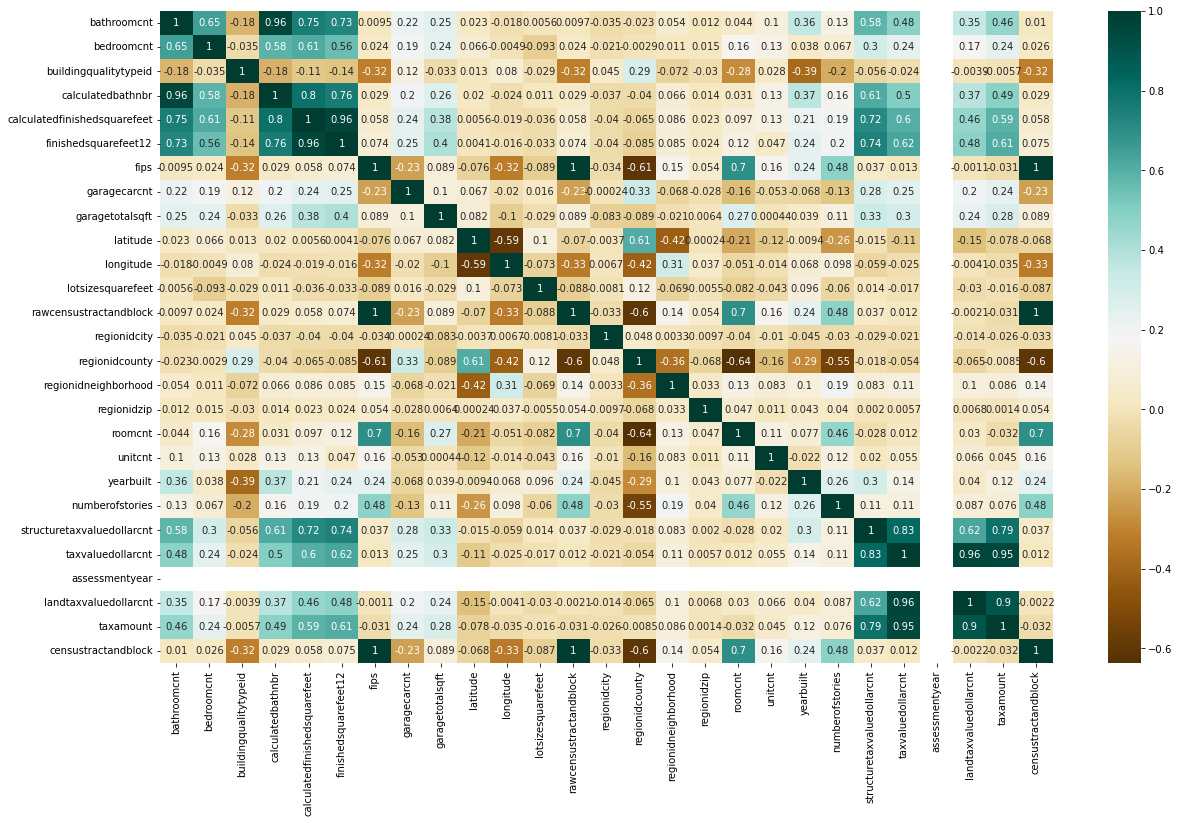

In [283]:
cor_matrix = zillow_num_tr_scalar.corr()
plt.figure(figsize=(20,12))
sns.heatmap(cor_matrix, cmap='BrBG', annot=True)

<font color = 'blue'> 'assesmentyear' feature has been taken care of further in the notebook </font>

### Removing features that show high correlation

In [284]:
upper_tri = cor_matrix.where(np.triu(np.ones(cor_matrix.shape),k=1).astype(np.bool))
print(upper_tri)

                              bathroomcnt  bedroomcnt  buildingqualitytypeid  \
bathroomcnt                           NaN     0.64612              -0.179368   
bedroomcnt                            NaN         NaN              -0.035334   
buildingqualitytypeid                 NaN         NaN                    NaN   
calculatedbathnbr                     NaN         NaN                    NaN   
calculatedfinishedsquarefeet          NaN         NaN                    NaN   
finishedsquarefeet12                  NaN         NaN                    NaN   
fips                                  NaN         NaN                    NaN   
garagecarcnt                          NaN         NaN                    NaN   
garagetotalsqft                       NaN         NaN                    NaN   
latitude                              NaN         NaN                    NaN   
longitude                             NaN         NaN                    NaN   
lotsizesquarefeet                     Na

C:\Users\ruchi\AppData\Local\Temp/ipykernel_20912/3477284062.py:1: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  upper_tri = cor_matrix.where(np.triu(np.ones(cor_matrix.shape),k=1).astype(np.bool))


In [285]:
to_drop = [column for column in upper_tri.columns if any(upper_tri[column] > 0.95)]
print(); print(to_drop)


['calculatedbathnbr', 'finishedsquarefeet12', 'rawcensustractandblock', 'landtaxvaluedollarcnt', 'censustractandblock']


In [286]:
zillow_num_tr_scalar.drop(columns=['calculatedbathnbr', 'finishedsquarefeet12', 'rawcensustractandblock', 'landtaxvaluedollarcnt', 'censustractandblock'], axis = 1, inplace = True)

In [287]:
zillow_num_tr_scalar.shape

(90275, 22)

### Concatinating the numeric and categorical feature to make a final preprocessed dataset

In [288]:
zillow_num_cat = pd.concat([zillow_num_tr_scalar, zillow_cat_tr_1hot, temp_y], axis = 1)

In [289]:
zillow_num_cat

,bathroomcnt,bedroomcnt,buildingqualitytypeid,calculatedfinishedsquarefeet,fips,garagecarcnt,garagetotalsqft,latitude,longitude,lotsizesquarefeet,regionidcity,regionidcounty,regionidneighborhood,regionidzip,roomcnt,unitcnt,yearbuilt,numberofstories,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,taxamount,airconditioningtypeid_1.0,airconditioningtypeid_3.0,airconditioningtypeid_5.0,airconditioningtypeid_9.0,airconditioningtypeid_11.0,airconditioningtypeid_13.0,heatingorsystemtypeid_1.0,heatingorsystemtypeid_2.0,heatingorsystemtypeid_6.0,heatingorsystemtypeid_7.0,heatingorsystemtypeid_10.0,heatingorsystemtypeid_11.0,heatingorsystemtypeid_12.0,heatingorsystemtypeid_13.0,heatingorsystemtypeid_14.0,heatingorsystemtypeid_18.0,heatingorsystemtypeid_20.0,heatingorsystemtypeid_24.0,propertylandusetypeid_31.0,propertylandusetypeid_47.0,propertylandusetypeid_246.0,propertylandusetypeid_247.0,propertylandusetypeid_248.0,propertylandusetypeid_260.0,propertylandusetypeid_261.0,propertylandusetypeid_263.0,propertylandusetypeid_264.0,propertylandusetypeid_265.0,propertylandusetypeid_266.0,propertylandusetypeid_267.0,propertylandusetypeid_269.0,propertylandusetypeid_275.0,logerror
parcelid,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
17073783,0.219590,-0.027558,-0.610150,-0.548448,3.006747,-0.084107,-1.412482,1.125385,-3.018203,-0.219327,0.014169,-0.576426,0.937898,0.135139,1.248925,1.073199,0.733816,2.333138,-0.310492,-0.479127,0.0,-0.580357,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0953
17088994,-1.274040,-0.892289,-0.610150,-1.072696,3.006747,-1.974972,-1.412482,1.009403,-2.773265,-0.138349,0.014169,-0.576426,1.127635,0.135685,0.894267,1.073199,0.902274,-0.440165,-0.172981,-0.392860,0.0,-0.497557,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0198
17100444,-0.278287,-0.027558,-0.610150,-0.723915,3.006747,-0.084107,0.584880,1.265796,-2.442426,-0.177432,-0.149581,-0.576426,-1.053496,0.143880,1.248925,1.738865,-0.529617,-0.440165,-0.700531,-0.738567,0.0,-0.788502,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0060
17102429,-0.776163,-0.892289,-0.610150,-0.236267,3.006747,-0.084107,0.670934,1.316792,-2.433538,-0.170230,-0.149581,-0.576426,2.929291,0.143880,1.248925,-0.258133,-0.150587,-0.440165,-0.643128,-0.711424,0.0,-0.775175,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.0566
17109604,0.219590,0.837173,-1.424668,0.690587,3.006747,-0.084107,1.599413,0.985671,-2.680312,-0.179538,0.014169,-0.576426,0.933151,0.135958,2.312902,-0.258133,0.649587,2.333138,0.464689,0.173607,0.0,-0.014182,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0573
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11876798,0.717466,0.837173,-0.610150,0.317047,-0.574474,1.806758,-0.330012,0.347641,0.094399,-0.191195,-0.463296,0.714393,-0.674354,-0.156615,-0.524369,-0.258133,1.660333,-0.440165,0.998903,0.249447,0.0,0.197687,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0276
12808516,-0.278287,-0.027558,1.018887,-0.453717,-0.574474,-0.084107,-0.330012,0.150274,0.630101,-0.180890,0.117091,0.714393,-0.437728,-0.026309,-0.524369,-0.258133,-0.529617,-0.440165,-0.448749,-0.503282,0.0,-0.517965,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.1188
12010248,-0.278287,-0.892289,-0.610150,-0.983348,-0.574474,-0.084107

<font color = 'blue'> Making a derived column for convenience and to remove redundancy. </font>

In [299]:
zillow_num_cat['yeardifference'] = zillow_num_cat['assessmentyear'] - zillow_num_cat['yearbuilt']
zillow_num_cat.drop(['assessmentyear', 'yearbuilt'], axis = 1, inplace = True)

In [300]:
zillow_num_cat

,bathroomcnt,bedroomcnt,buildingqualitytypeid,calculatedfinishedsquarefeet,fips,garagecarcnt,garagetotalsqft,latitude,longitude,lotsizesquarefeet,regionidcity,regionidcounty,regionidneighborhood,regionidzip,roomcnt,unitcnt,numberofstories,structuretaxvaluedollarcnt,taxvaluedollarcnt,taxamount,airconditioningtypeid_1.0,airconditioningtypeid_3.0,airconditioningtypeid_5.0,airconditioningtypeid_9.0,airconditioningtypeid_11.0,airconditioningtypeid_13.0,heatingorsystemtypeid_1.0,heatingorsystemtypeid_2.0,heatingorsystemtypeid_6.0,heatingorsystemtypeid_7.0,heatingorsystemtypeid_10.0,heatingorsystemtypeid_11.0,heatingorsystemtypeid_12.0,heatingorsystemtypeid_13.0,heatingorsystemtypeid_14.0,heatingorsystemtypeid_18.0,heatingorsystemtypeid_20.0,heatingorsystemtypeid_24.0,propertylandusetypeid_31.0,propertylandusetypeid_47.0,propertylandusetypeid_246.0,propertylandusetypeid_247.0,propertylandusetypeid_248.0,propertylandusetypeid_260.0,propertylandusetypeid_261.0,propertylandusetypeid_263.0,propertylandusetypeid_264.0,propertylandusetypeid_265.0,propertylandusetypeid_266.0,propertylandusetypeid_267.0,propertylandusetypeid_269.0,propertylandusetypeid_275.0,logerror,yeardifference
parcelid,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
17073783,0.219590,-0.027558,-0.610150,-0.548448,3.006747,-0.084107,-1.412482,1.125385,-3.018203,-0.219327,0.014169,-0.576426,0.937898,0.135139,1.248925,1.073199,2.333138,-0.310492,-0.479127,-0.580357,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0953,-0.733816
17088994,-1.274040,-0.892289,-0.610150,-1.072696,3.006747,-1.974972,-1.412482,1.009403,-2.773265,-0.138349,0.014169,-0.576426,1.127635,0.135685,0.894267,1.073199,-0.440165,-0.172981,-0.392860,-0.497557,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0198,-0.902274
17100444,-0.278287,-0.027558,-0.610150,-0.723915,3.006747,-0.084107,0.584880,1.265796,-2.442426,-0.177432,-0.149581,-0.576426,-1.053496,0.143880,1.248925,1.738865,-0.440165,-0.700531,-0.738567,-0.788502,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0060,0.529617
17102429,-0.776163,-0.892289,-0.610150,-0.236267,3.006747,-0.084107,0.670934,1.316792,-2.433538,-0.170230,-0.149581,-0.576426,2.929291,0.143880,1.248925,-0.258133,-0.440165,-0.643128,-0.711424,-0.775175,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.0566,0.150587
17109604,0.219590,0.837173,-1.424668,0.690587,3.006747,-0.084107,1.599413,0.985671,-2.680312,-0.179538,0.014169,-0.576426,0.933151,0.135958,2.312902,-0.258133,2.333138,0.464689,0.173607,-0.014182,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0573,-0.649587
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11876798,0.717466,0.837173,-0.610150,0.317047,-0.574474,1.806758,-0.330012,0.347641,0.094399,-0.191195,-0.463296,0.714393,-0.674354,-0.156615,-0.524369,-0.258133,-0.440165,0.998903,0.249447,0.197687,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0276,-1.660333
12808516,-0.278287,-0.027558,1.018887,-0.453717,-0.574474,-0.084107,-0.330012,0.150274,0.630101,-0.180890,0.117091,0.714393,-0.437728,-0.026309,-0.524369,-0.258133,-0.440165,-0.448749,-0.503282,-0.517965,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.1188,0.529617
12010248,-0.278287,-0.892289,-0.610150,-0.983348,-0.574474,-0.084107,0.670934,0.360080,-0.312910,-0.191004,-0.

### Removing the outliers

In [308]:
from scipy import stats
z = np.abs(stats.zscore(zillow_num_cat))
zillow_no_out = zillow_num_cat[(z<4).all(axis=1)]
zillow_no_out.shape

(75136, 54)

In [390]:
zillow_no_out.head()

,bathroomcnt,bedroomcnt,buildingqualitytypeid,calculatedfinishedsquarefeet,fips,garagecarcnt,garagetotalsqft,latitude,longitude,lotsizesquarefeet,regionidcity,regionidcounty,regionidneighborhood,regionidzip,roomcnt,unitcnt,numberofstories,structuretaxvaluedollarcnt,taxvaluedollarcnt,taxamount,airconditioningtypeid_1.0,airconditioningtypeid_3.0,airconditioningtypeid_5.0,airconditioningtypeid_9.0,airconditioningtypeid_11.0,airconditioningtypeid_13.0,heatingorsystemtypeid_1.0,heatingorsystemtypeid_2.0,heatingorsystemtypeid_6.0,heatingorsystemtypeid_7.0,heatingorsystemtypeid_10.0,heatingorsystemtypeid_11.0,heatingorsystemtypeid_12.0,heatingorsystemtypeid_13.0,heatingorsystemtypeid_14.0,heatingorsystemtypeid_18.0,heatingorsystemtypeid_20.0,heatingorsystemtypeid_24.0,propertylandusetypeid_31.0,propertylandusetypeid_47.0,propertylandusetypeid_246.0,propertylandusetypeid_247.0,propertylandusetypeid_248.0,propertylandusetypeid_260.0,propertylandusetypeid_261.0,propertylandusetypeid_263.0,propertylandusetypeid_264.0,propertylandusetypeid_265.0,propertylandusetypeid_266.0,propertylandusetypeid_267.0,propertylandusetypeid_269.0,propertylandusetypeid_275.0,logerror,yeardifference
parcelid,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
17088994,-1.274040,-0.892289,-0.610150,-1.072696,3.006747,-1.974972,-1.412482,1.009403,-2.773265,-0.138349,0.014169,-0.576426,1.127635,0.135685,0.894267,1.073199,-0.440165,-0.172981,-0.392860,-0.497557,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0198,-0.902274
17100444,-0.278287,-0.027558,-0.610150,-0.723915,3.006747,-0.084107,0.584880,1.265796,-2.442426,-0.177432,-0.149581,-0.576426,-1.053496,0.143880,1.248925,1.738865,-0.440165,-0.700531,-0.738567,-0.788502,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0060,0.529617
17102429,-0.776163,-0.892289,-0.610150,-0.236267,3.006747,-0.084107,0.670934,1.316792,-2.433538,-0.170230,-0.149581,-0.576426,2.929291,0.143880,1.248925,-0.258133,-0.440165,-0.643128,-0.711424,-0.775175,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.0566,0.150587
17109604,0.219590,0.837173,-1.424668,0.690587,3.006747,-0.084107,1.599413,0.985671,-2.680312,-0.179538,0.014169,-0.576426,0.933151,0.135958,2.312902,-0.258133,2.333138,0.464689,0.173607,-0.014182,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0573,-0.649587
17125829,0.219590,0.837173,-0.610150,1.193306,3.006747,-0.084107,0.729813,0.885416,-2.290410,-0.147696,0.374947,-0.576426,-1.053496,0.137324,2.312902,0.407533,2.333138,0.201704,-0.302876,-0.420182,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0564,-0.481129


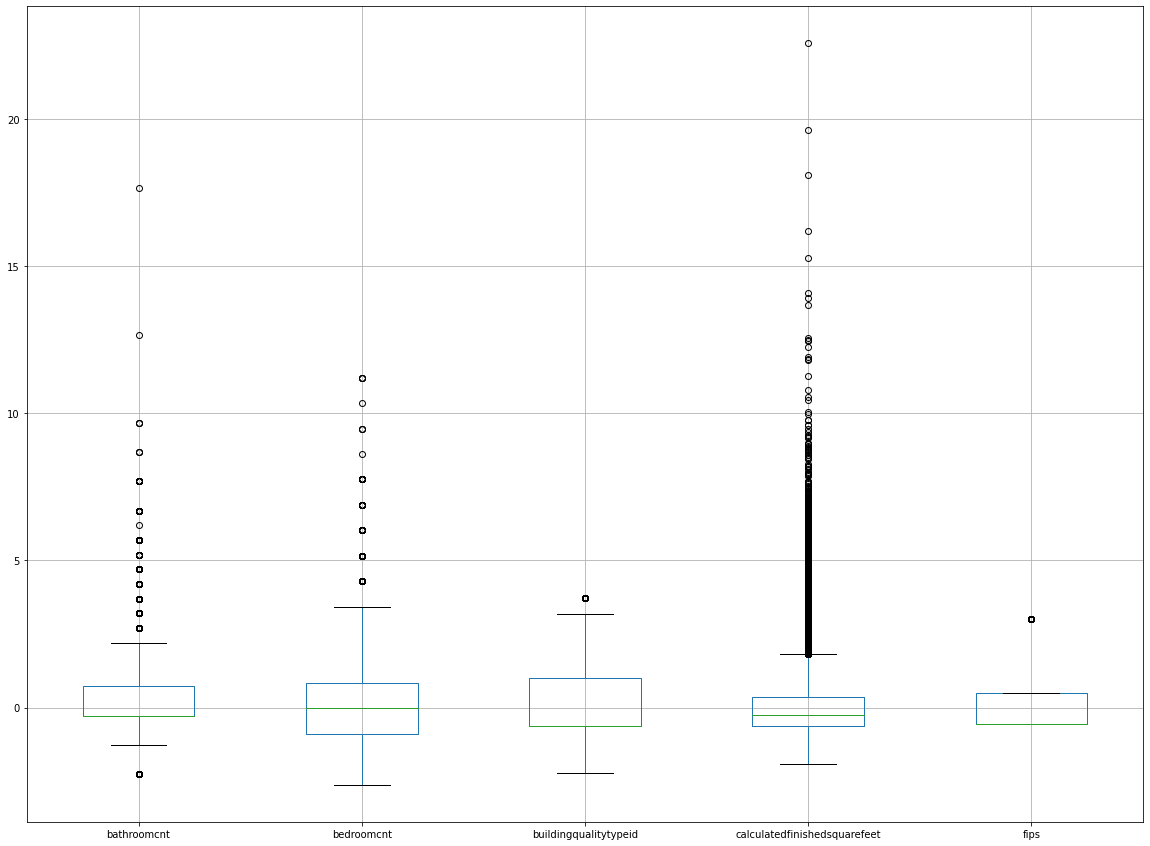

In [315]:

boxplot = zillow_num_tr_scalar.boxplot(column=zillow_num_tr_scalar.columns.to_list()[:5],figsize=(20,15))  

### Saving the final clean dataset as a CSV

In [316]:
zillow_no_out.to_csv('final_zillow_dataset.csv', index=False)


## Splitting the Train and Test sets

In [391]:
final_data = zillow_no_out.copy()
X = final_data.drop('logerror', axis=1)
y = final_data['logerror']


In [392]:
print(X.shape, y.shape)

(75136, 53) (75136,)


In [393]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.51, random_state = 42)

<font color='blue'> ONLY train set will be used for training different models, calculating the MAE scores and for cross validation.
    Test set will be a hold out and will be used in the final model prediction.
    

# Model Training

## Linear Regression Model

In [394]:
from sklearn.linear_model import LinearRegression, ElasticNet, Ridge, Lasso, SGDRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from math import sqrt

In [395]:
linear_reg = LinearRegression()

linear_reg.fit(X_train, y_train)

LinearRegression()

In [396]:
linear_reg_pred = linear_reg.predict(X_train)

print('Mean Absolute Error : {}'.format(mean_absolute_error(y_train, linear_reg_pred)))
print()
print('Mean Squared Error : {}'.format(mean_squared_error(y_train, linear_reg_pred)))
print()
print('Root Mean Squared Error : {}'.format(sqrt(mean_squared_error(y_train, linear_reg_pred))))

Mean Absolute Error : 0.05523503968334559

Mean Squared Error : 0.008630787077028504

Root Mean Squared Error : 0.09290202945591934


## Ridge Regression Model

In [397]:
ridge_reg = Ridge(alpha=1, solver='cholesky')

ridge_reg.fit(X_train, y_train)

Ridge(alpha=1, solver='cholesky')

In [398]:
ridge_reg_pred = ridge_reg.predict(X_train)

print('Mean Absolute Error : {}'.format(mean_absolute_error(y_train, ridge_reg_pred)))
print()
print('Mean Squared Error : {}'.format(mean_squared_error(y_train, ridge_reg_pred)))
print()
print('Root Mean Squared Error : {}'.format(sqrt(mean_squared_error(y_train, ridge_reg_pred))))

Mean Absolute Error : 0.055234734114368536

Mean Squared Error : 0.008630787190588065

Root Mean Squared Error : 0.09290203006709845


## Lasso Regression Model

In [399]:
lasso_reg = Lasso(alpha=0.1)

lasso_reg.fit(X_train, y_train)

Lasso(alpha=0.1)

In [400]:
lasso_reg_pred = lasso_reg.predict(X_train)

print('Mean Absolute Error : {}'.format(mean_absolute_error(y_train, lasso_reg_pred)))
print()
print('Mean Squared Error : {}'.format(mean_squared_error(y_train, lasso_reg_pred)))
print()
print('Root Mean Squared Error : {}'.format(sqrt(mean_squared_error(y_train, lasso_reg_pred))))

Mean Absolute Error : 0.05529289376825208

Mean Squared Error : 0.008719189311934805

Root Mean Squared Error : 0.09337659938086632


## XG Boost Regression Model

In [401]:
import xgboost
xgb_reg = xgboost.XGBRegressor()

xgb_reg.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.300000012,
             max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=8,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [402]:
xgb_reg_pred = xgb_reg.predict(X_train)

print('Mean Absolute Error : {}'.format(mean_absolute_error(y_train, xgb_reg_pred)))
print()
print('Mean Squared Error : {}'.format(mean_squared_error(y_train, xgb_reg_pred)))
print()
print('Root Mean Squared Error : {}'.format(sqrt(mean_squared_error(y_train, xgb_reg_pred))))

Mean Absolute Error : 0.0475635331448463

Mean Squared Error : 0.0057537478190364194

Root Mean Squared Error : 0.07585346280188149


## Decision Tree Regressor

In [403]:
tree_reg = DecisionTreeRegressor(max_depth=5)

tree_reg.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=5)

In [404]:
tree_reg_pred = tree_reg.predict(X_train)

print('Mean Absolute Error : {}'.format(mean_absolute_error(y_train, tree_reg_pred)))
print()
print('Mean Squared Error : {}'.format(mean_squared_error(y_train, tree_reg_pred)))
print()
print('Root Mean Squared Error : {}'.format(sqrt(mean_squared_error(y_train, tree_reg_pred))))

Mean Absolute Error : 0.05507120771005033

Mean Squared Error : 0.008493534928795232

Root Mean Squared Error : 0.09216037613201908


## Support Vector Regression

In [405]:
from sklearn.svm import SVR

svm_reg = SVR(kernel="linear")
svm_reg.fit(X_train, y_train)

SVR(kernel='linear')

In [406]:
svm_reg_pred = svm_reg.predict(X_train)

print('Mean Absolute Error : {}'.format(mean_absolute_error(y_train, svm_reg_pred)))
print()
print('Mean Squared Error : {}'.format(mean_squared_error(y_train, svm_reg_pred)))
print()
print('Root Mean Squared Error : {}'.format(sqrt(mean_squared_error(y_train, svm_reg_pred))))

Mean Absolute Error : 0.056938459591639116

Mean Squared Error : 0.00871586610737534

Root Mean Squared Error : 0.09335880305239212


## Random Forest Regression Model

In [407]:
forest_reg = RandomForestRegressor(n_estimators= 500, max_depth=6)

forest_reg.fit(X_train, y_train)

RandomForestRegressor(max_depth=6, n_estimators=500)

In [408]:
forest_reg_pred = forest_reg.predict(X_train)

print('Mean Absolute Error : {}'.format(mean_absolute_error(y_train, forest_reg_pred)))
print()
print('Mean Squared Error : {}'.format(mean_squared_error(y_train, forest_reg_pred)))
print()
print('Root Mean Squared Error : {}'.format(sqrt(mean_squared_error(y_train, forest_reg_pred))))

Mean Absolute Error : 0.05458029812261403

Mean Squared Error : 0.008313609880766399

Root Mean Squared Error : 0.09117899912132398


### Comparing the MAE of all models

In [409]:
print('Linear Regression Model : {}'.format(mean_absolute_error(y_train, linear_reg_pred)))
print('Ridge Regression Model : {}'.format(mean_absolute_error(y_train, ridge_reg_pred)))
print('Lasso Regression Model : {}'.format(mean_absolute_error(y_train, lasso_reg_pred)))
print('XG Boost Regression Model : {}'.format(mean_absolute_error(y_train, xgb_reg_pred)))
print('Decision Tree Regression Model : {}'.format(mean_absolute_error(y_train, tree_reg_pred)))
print('Support Vector Regression Model : {}'.format(mean_absolute_error(y_train, svm_reg_pred)))
print('Random Forest Regression Model : {}'.format(mean_absolute_error(y_train, forest_reg_pred)))


Linear Regression Model : 0.05523503968334559
Ridge Regression Model : 0.055234734114368536
Lasso Regression Model : 0.05529289376825208
XG Boost Regression Model : 0.0475635331448463
Decision Tree Regression Model : 0.05507120771005033
Support Vector Regression Model : 0.056938459591639116
Random Forest Regression Model : 0.05458029812261403


<font color='blue'> The XG Boost Regression Model performs the best here. But lets go ahead and train these models on cross-validation dataset

## Cross Validation for all models and evaluating their MAE

In [410]:
def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())

In [411]:
linear_reg_scores = cross_val_score(linear_reg, X_train, y_train, scoring="neg_mean_absolute_error", cv=10)
display_scores(-linear_reg_scores)

Scores: [0.05511841 0.05532859 0.0548349  0.05620229 0.05419821 0.05685691
 0.05557731 0.05350234 0.0561058  0.05504648]
Mean: 0.05527712291759982
Standard deviation: 0.000933755415873505


In [412]:
ridge_reg_scores = cross_val_score(ridge_reg, X_train, y_train, scoring="neg_mean_absolute_error", cv=10)
display_scores(-ridge_reg_scores)

Scores: [0.05511799 0.0553281  0.05483477 0.05620213 0.05419813 0.05685646
 0.05557651 0.05350195 0.05610525 0.05504637]
Mean: 0.055276764508918275
Standard deviation: 0.0009336841076258649


In [413]:
lasso_reg_scores = cross_val_score(lasso_reg, X_train, y_train, scoring="neg_mean_absolute_error", cv=10)
display_scores(-lasso_reg_scores)

Scores: [0.0553428  0.05518676 0.05497609 0.05609444 0.05419694 0.05699207
 0.05540836 0.05355053 0.05615097 0.05506035]
Mean: 0.05529593177240906
Standard deviation: 0.0009318976703810078


In [414]:
xgb_reg_scores = cross_val_score(xgb_reg, X_train, y_train, scoring="neg_mean_absolute_error", cv=10)
display_scores(-xgb_reg_scores)


Scores: [0.05775737 0.05710634 0.05702761 0.0585828  0.05629974 0.05959925
 0.05758554 0.05627985 0.05865054 0.05784408]
Mean: 0.057673311917635826
Standard deviation: 0.001005093269806445


In [415]:
tree_reg_scores = cross_val_score(tree_reg, X_train, y_train, scoring="neg_mean_absolute_error", cv=10)
display_scores(-tree_reg_scores)

Scores: [0.05578561 0.05556788 0.05514166 0.0563117  0.05426627 0.05760603
 0.05573714 0.05409885 0.05638481 0.0553516 ]
Mean: 0.05562515593799271
Standard deviation: 0.0009746095782877003


In [416]:
# svm_reg_scores = cross_val_score(svm_reg, X_train, y_train, scoring="neg_mean_absolute_error", cv=10)
# display_scores(-svm_reg_scores)

In [417]:
forest_reg_scores = cross_val_score(forest_reg, X_train, y_train, scoring="neg_mean_absolute_error", cv=10)
display_scores(-forest_reg_scores)

Scores: [0.0552581  0.05494558 0.05479435 0.05601718 0.05402035 0.05696288
 0.05525882 0.0534144  0.05587856 0.05497527]
Mean: 0.0551525473011512
Standard deviation: 0.0009528910416967243


<font color='blue'> Here we can see the Random Forest model that has the least MAE.
    Therefore,lets go ahead and tune hyperparameters for this model

# Fine-Tuning the best model

## Grid Search CV

In [432]:
param_grid = [
    {'n_estimators': [20, 40, 80], 'max_features': [33, 43, 53]},
    {'bootstrap': [False], 'n_estimators':  [20, 40, 80], 'max_features': [33, 43, 53]}]

forest_regressor = RandomForestRegressor()

grid_search = GridSearchCV(forest_regressor, param_grid, scoring='neg_mean_squared_error',return_train_score=True,cv=3)

In [433]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=RandomForestRegressor(),
             param_grid=[{'max_features': [33, 43, 53],
                          'n_estimators': [20, 40, 80]},
                         {'bootstrap': [False], 'max_features': [33, 43, 53],
                          'n_estimators': [20, 40, 80]}],
             return_train_score=True, scoring='neg_mean_squared_error')

In [434]:
grid_search.best_params_

{'max_features': 43, 'n_estimators': 80}

In [435]:
grid_search.best_estimator_

RandomForestRegressor(max_features=43, n_estimators=80)

In [436]:
final_predictor = grid_search.best_estimator_
final_predictor.fit(X_train, y_train)
final_pred = final_predictor.predict(X_test)

In [437]:
print('Mean Absolute Error : {}'.format(mean_absolute_error(y_test, final_pred)))
print()
print('Mean Squared Error : {}'.format(mean_squared_error(y_test, final_pred)))
print()
print('Root Mean Squared Error : {}'.format(sqrt(mean_squared_error(y_test, final_pred))))

Mean Absolute Error : 0.05776297788464327

Mean Squared Error : 0.008946672803599946

Root Mean Squared Error : 0.09458685322813074


In [499]:
import pickle

pickle.dump(final_predictor, open('zillow.model', 'wb'))